In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pyspark.sql.types import NumericType
import csv
import numpy as np
from matplotlib.animation import FuncAnimation

In [4]:
# Crear o recuperar una sesión de Spark
spark = SparkSession.builder \
    .appName("CorrExample") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.python.worker.memory", "4g") \
    .getOrCreate()

# Verificar la versión de Spark
print(f"Versión de Spark: {spark.version}")

# Finalizar la sesión (cuando termines)
# spark.stop()

25/02/19 00:08:40 WARN Utils: Your hostname, MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.68 instead (on interface en0)
25/02/19 00:08:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/19 00:08:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Versión de Spark: 3.5.4


------------------------------



# **Introduction**

![Life Expentancy](img/LE.jpg)

Life expectancy prognosing is a complex and multifaceted problem that involves analyzing a wide range of factors that can influence a person's lifespan. From a substantive point of view, there are several key considerations that must be taken into account when attempting to accurately predict life expectancy.

It is important to recognize that life expectancy is not a fixed value that is determined solely by genetics or other inherent factors. Rather, it is influenced by a wide range of environmental, social, and behavioral factors that can vary significantly across different populations and individuals. For example, access to healthcare, nutrition, and clean water can all have a significant impact on life expectancy, as can lifestyle factors such as smoking, alcohol consumption, and physical activity levels.


Life expectancy prognosing can have significant implications for both individuals and society as a whole. Accurate life expectancy forecasts can help individuals make important decisions about their healthcare, financial planning, and retirement, while also providing policymakers with valuable information about population health and healthcare needs.


Overall, the problem in question requires a deep understanding of a wide range of social, environmental, and behavioral factors. By taking a substantive approach to this problem and carefully considering all of the relevant factors, we can develop more accurate and useful life expectancy forecasts that can help individuals and society make better-informed decisions about health and well-being.

---------------------
# **Data Explanation:**

TARGET: "Life Expectancy"



1. Country - List of the 179 countries
2. Region - 179 countries are distributed in 9 regions. E.g. Africa, Asia, Oceania, European Union, Rest of Europe and etc.
3. Year - Years observed from 2000 to 2015
4. Infant_deaths - Represents infant deaths per 1000 population
5. Under_five_deaths - Represents deaths of children under five years old per 1000 population
6. Adult_mortality - Represents deaths of adults per 1000 population
7. Alcohol_consumption - Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old
8. Hepatitis_B - Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds.
9. Measles - Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds
10. BMI- BMI is a measure of nutritional status in adults. It is defined as a person's weight in kilograms divided by the square of that person's height in meters (kg/m2)
11. Polio - Represents % of coverage of Polio (Pol3) immunization among 1-year-olds.
12. Diphtheria - Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds.
13. Incidents_HIV - Incidents of HIV per 1000 population aged 15-49
14. GDP_per_capita - GDP per capita in current USD
15. Population_mln - Total population in millions
16. Thinness_ten_nineteen_years - Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 standard deviations below the median.
17. Thinness_five_nine_years - Prevalence of thinness among children aged 5-9 years. BMI < -2 standard deviations below the median.
18. Schooling - Average years that people aged 25+ spent in formal education
19. Economy_status_Developed - Developed country
20. Economy_status_Developing - Developing country
21. Life_expectancy - Average life expectancy for both genders in different years from 2010 to 2015

# **Report**

## **Problem:** prediction of life expectancy, based on the key country features and recognition of key factors influencing the target 
**Date:** 03-02-2025

**Author:** Dionicio Pérez ([LinkedIn](https://www.linkedin.com/in/dionicio-alberto/))

### **Aproach**
**Chosen model:**

Linear Regresion
Decission Tree Regression

### **Tools and Libreries**
- PySpark
- Pandas
- Matplotlib
- Seaborn


---------

# **Data Explorer**

## Load and Read Dataset

In [5]:
Life_expectancy = pd.read_csv(
    filepath_or_buffer="../data/Raw/LIFE.csv"
)

In [6]:
dataset = spark.read.csv(
    path="../data/Raw/LIFE.csv",
    header=True,
    inferSchema=True)

In [7]:
dataset.show()

+------------------+--------------------+----+-------------+-----------------+---------------+-------------------+-----------+-------+----+-----+----------+-------------+--------------+--------------+---------------------------+------------------------+---------+------------------------+-------------------------+---------------+
|           Country|              Region|Year|Infant_deaths|Under_five_deaths|Adult_mortality|Alcohol_consumption|Hepatitis_B|Measles| BMI|Polio|Diphtheria|Incidents_HIV|GDP_per_capita|Population_mln|Thinness_ten_nineteen_years|Thinness_five_nine_years|Schooling|Economy_status_Developed|Economy_status_Developing|Life_expectancy|
+------------------+--------------------+----+-------------+-----------------+---------------+-------------------+-----------+-------+----+-----+----------+-------------+--------------+--------------+---------------------------+------------------------+---------+------------------------+-------------------------+---------------+
|      

In [8]:
dataset.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Infant_deaths: double (nullable = true)
 |-- Under_five_deaths: double (nullable = true)
 |-- Adult_mortality: double (nullable = true)
 |-- Alcohol_consumption: double (nullable = true)
 |-- Hepatitis_B: integer (nullable = true)
 |-- Measles: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Diphtheria: integer (nullable = true)
 |-- Incidents_HIV: double (nullable = true)
 |-- GDP_per_capita: integer (nullable = true)
 |-- Population_mln: double (nullable = true)
 |-- Thinness_ten_nineteen_years: double (nullable = true)
 |-- Thinness_five_nine_years: double (nullable = true)
 |-- Schooling: double (nullable = true)
 |-- Economy_status_Developed: integer (nullable = true)
 |-- Economy_status_Developing: integer (nullable = true)
 |-- Life_expectancy: double (nullable = true)



## Esperanza de vida

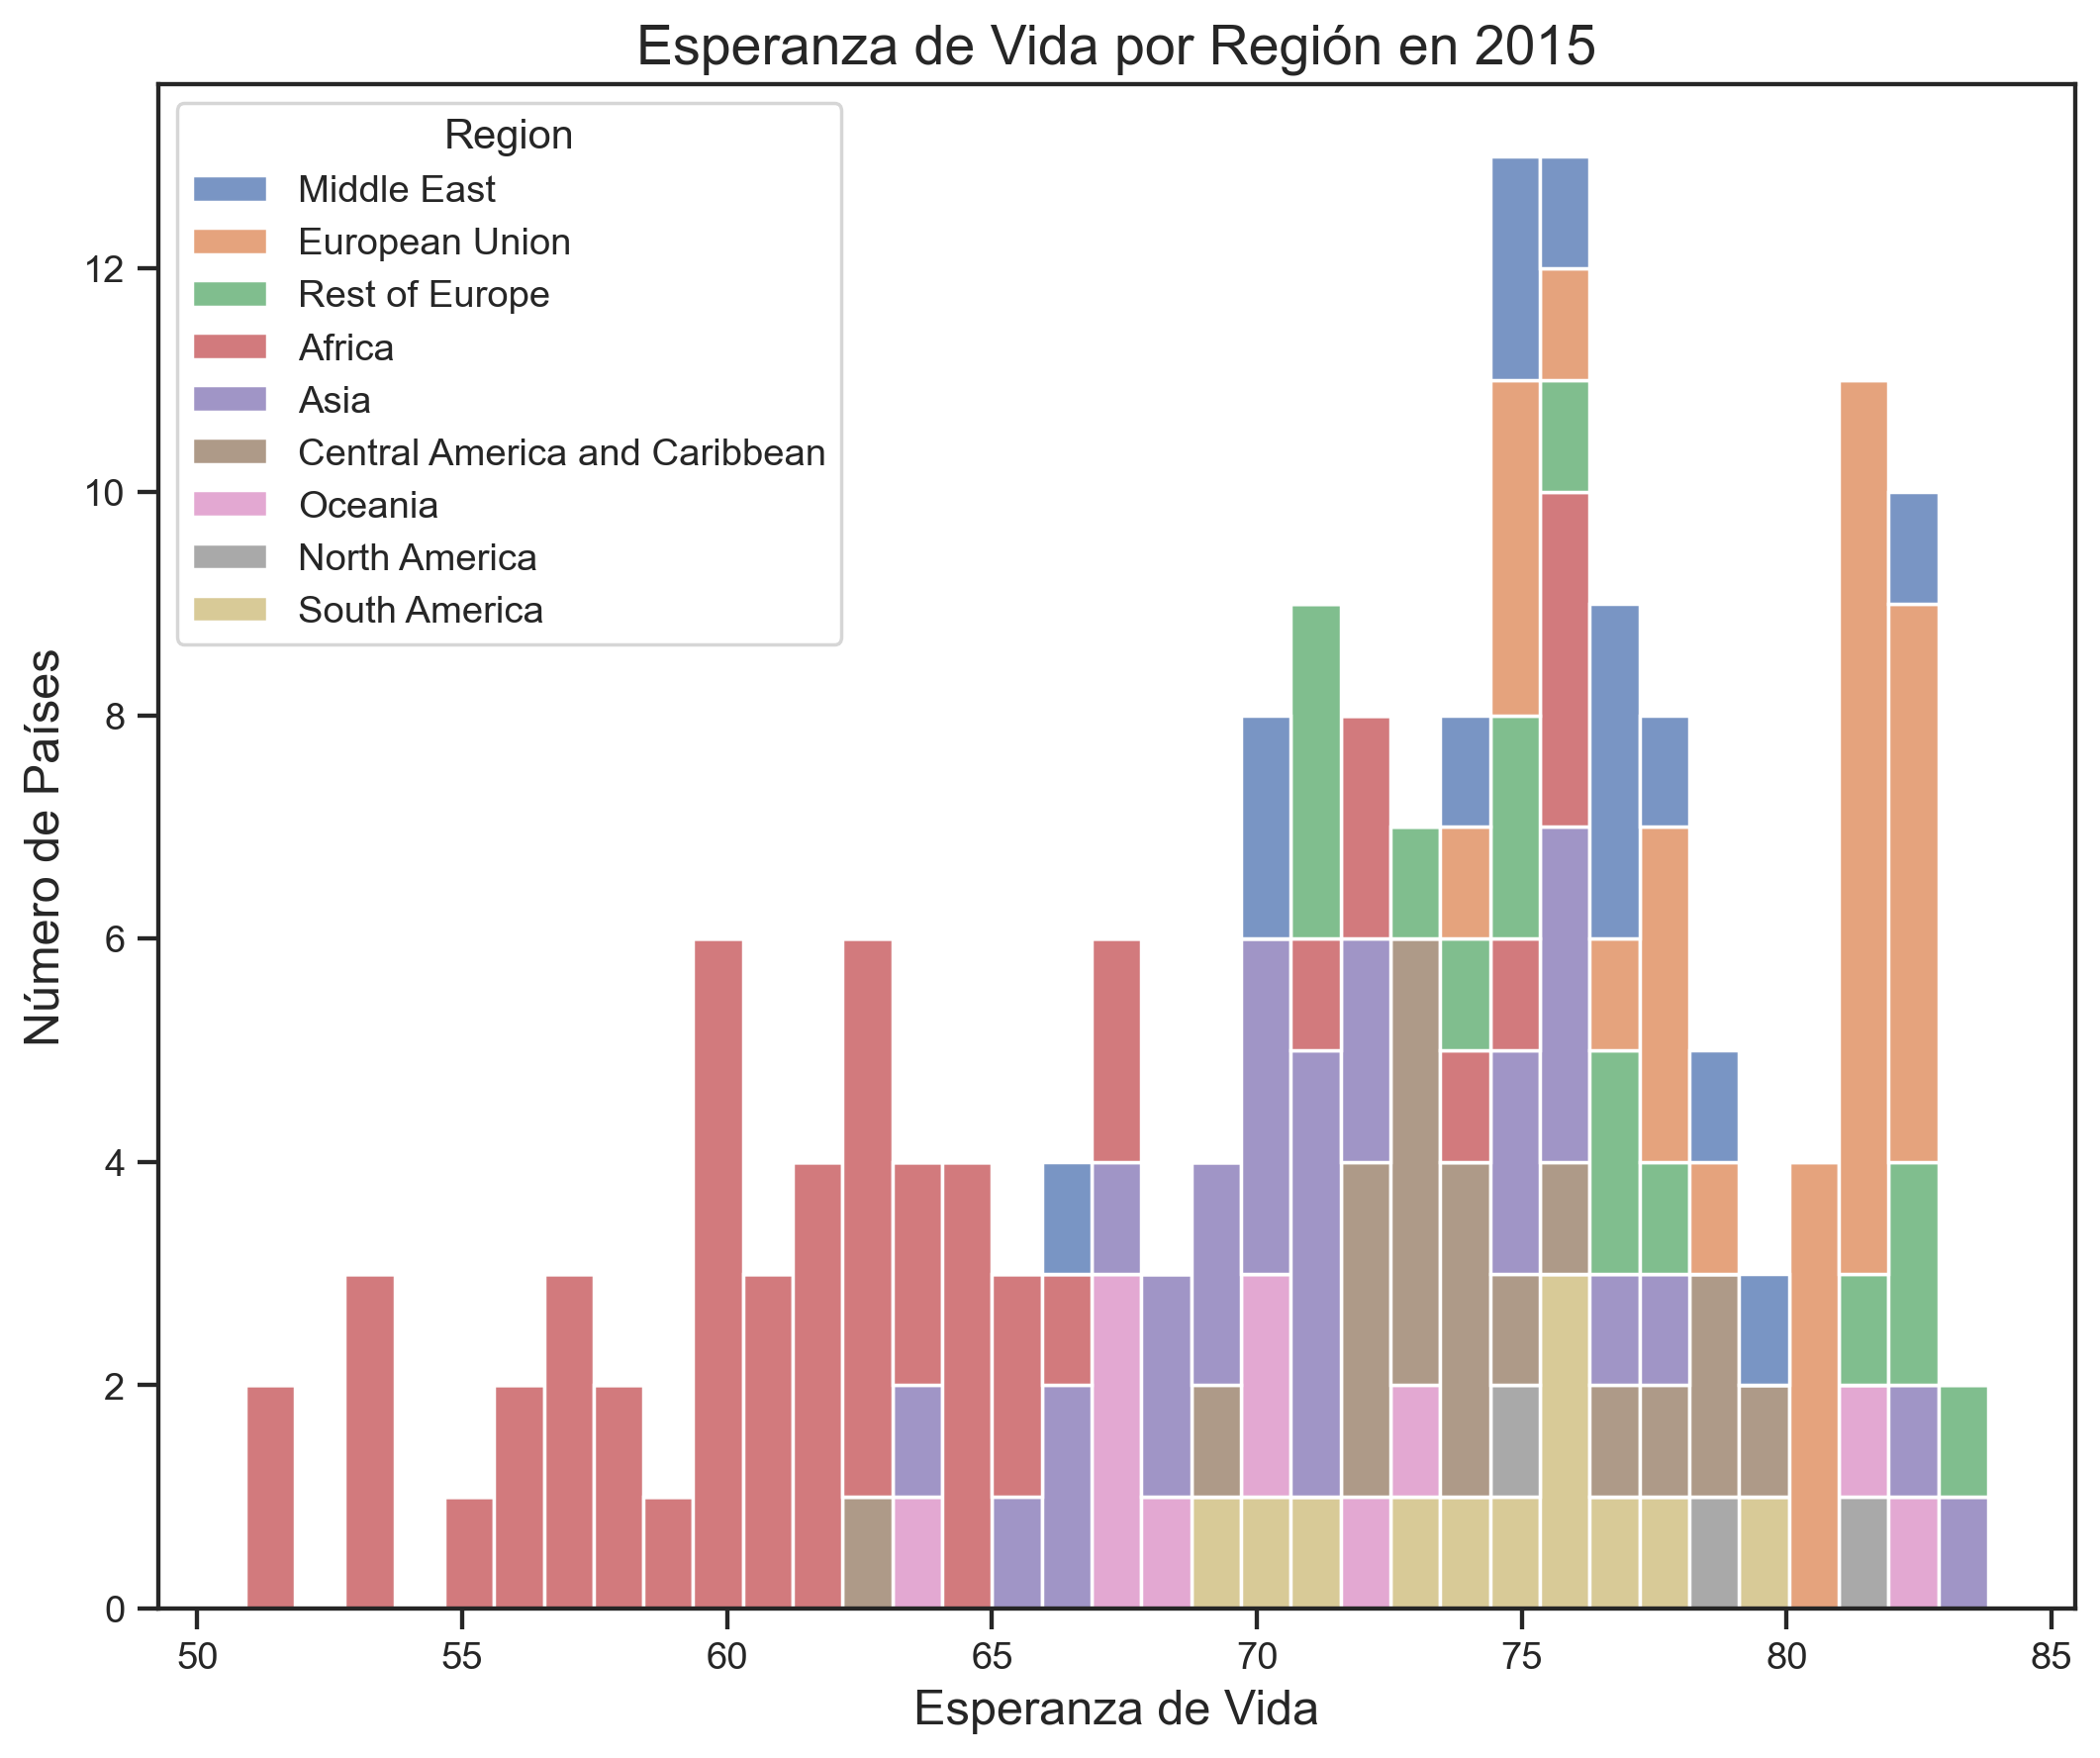

In [9]:
# Configurar el tema de Seaborn
sns.set_theme(style='ticks')

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=250)

# Crear el histograma en el eje ax
sns.histplot(
    x='Life_expectancy', 
    data=Life_expectancy[Life_expectancy["Year"] == 2015],
    color='#eb612a',
    hue="Region",
    multiple="stack",
    bins=35,
    ax=ax  # Aquí se asigna el gráfico al eje
)

# Personalización del gráfico usando el eje ax
ax.set_title('Esperanza de Vida por Región en 2015', fontsize=16)
ax.set_xlabel('Esperanza de Vida', fontsize=14)
ax.set_ylabel('Número de Países', fontsize=14)

# Mostrar el gráfico
plt.show()

En este grafico mostramos como esta distribuida la esperanza de vida en el año 2015.

Podemos destacar que cada region se agrupa en diferentes rangos. Por ejemplo, la mayoria de los países pertenecientes a la region de Africa, son los que tienen la menor esperanza de vida, mientras que los paises pertenecientes a la union europea conforman la region con la mayor esperanza de vida

A continuacion se muestra como ha evolucionado con los años

In [10]:
data = Life_expectancy.copy()
# Obtener los años únicos para la animación
years = sorted(data['Year'].unique())

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')


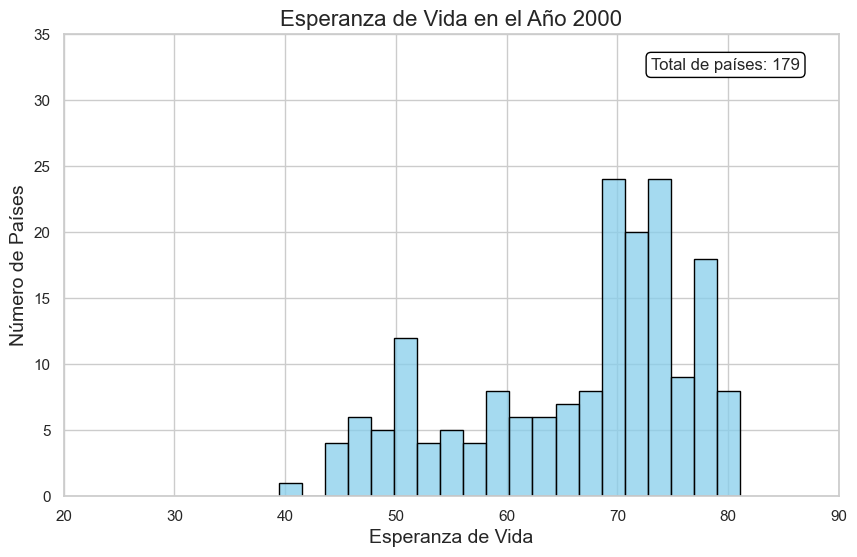

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 2. Verificar los nombres de las columnas
print(data.columns)  # Verifica que las columnas sean correctas

# 3. Limpiar espacios en los nombres de las columnas si es necesario
data.columns = data.columns.str.strip()

# 4. Configurar el estilo de Seaborn para hacer gráficos más estéticos
sns.set_theme(style="whitegrid")

# 5. Crear la figura para la animación
fig, ax = plt.subplots(figsize=(10, 6))

# 6. Función para actualizar el histograma en cada cuadro de la animación
def update(year):
    ax.clear()  # Limpia el gráfico para dibujar el siguiente año
    yearly_data = data[data['Year'] == year]['Life_expectancy']  # Filtra la esperanza de vida para el año actual
    
    # Crear el histograma usando Seaborn
    sns.histplot(yearly_data, bins=20, kde=False, color='skyblue', edgecolor='black', ax=ax)
    
    # Personalización del gráfico
    ax.set_title(f'Esperanza de Vida en el Año {year}', fontsize=16)
    ax.set_xlabel('Esperanza de Vida', fontsize=14)
    ax.set_ylabel('Número de Países', fontsize=14)
    ax.set_xlim(20, 90)  # Ajusta según tu rango de datos
    ax.set_ylim(0, 35)
    
    # Mostrar la cantidad total de países en el año actual
    total_countries = yearly_data.count()
    ax.text(0.95, 0.95, f'Total de países: {total_countries}', transform=ax.transAxes,
            fontsize=12, ha='right', va='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# 7. Obtener el rango de años únicos en los datos
years = sorted(data['Year'].unique())

# 8. Crear la animación
anim = FuncAnimation(fig, update, frames=years, interval=500)

# 9. Guardar la animación como un archivo GIF o MP4
anim.save('../data/Generated/life_expectancy_histogram.gif', writer='pillow')
# Si prefieres un MP4, descomenta la siguiente línea
# anim.save('life_expectancy_histogram.mp4', writer='ffmpeg')


![Histogrma Historico](../data/Generated/life_expectancy_histogram.gif)

En esta gráfica resaltamos que con el pasar de los años, la esperanza de vida en toda las regiones tiene una tendencia de ir aumentando

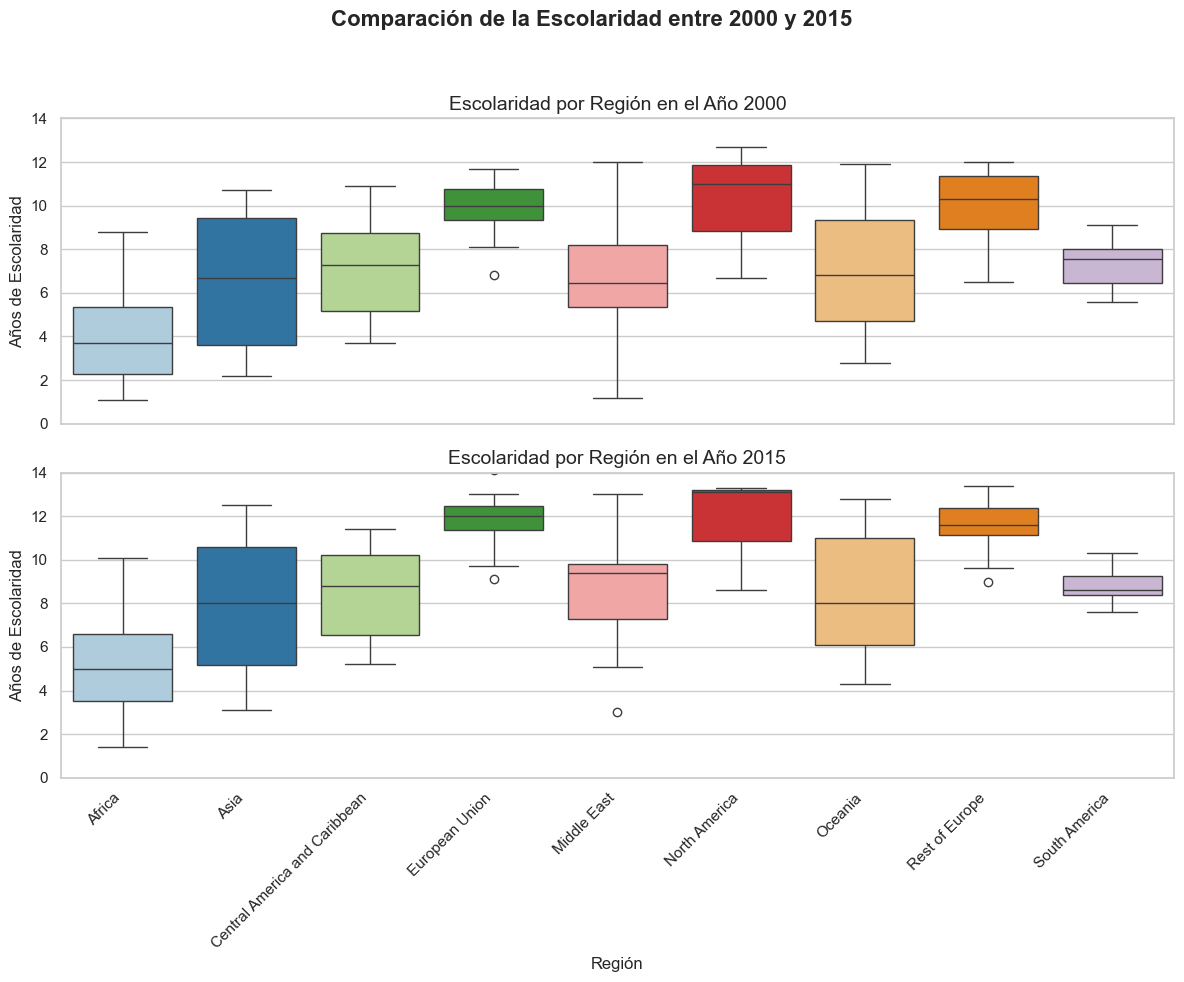

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Definir el orden de las regiones (basado en el año 2000 para consistencia)
region_order = sorted(Life_expectancy['Region'].unique())

# Crear una paleta de colores personalizada y consistente para las regiones
palette = dict(zip(region_order, sns.color_palette('Paired', n_colors=len(region_order))))

# Gráfico del año 2000
sns.boxplot(
    x='Region', 
    y='Schooling', 
    data=Life_expectancy[Life_expectancy["Year"] == 2000], 
    hue='Region',
    palette=palette,  # Usar paleta personalizada
    legend=False,
    order=region_order,  # Mantener el mismo orden
    ax=ax[0]
)
ax[0].set_title("Escolaridad por Región en el Año 2000", fontsize=14)
ax[0].set_xlabel('')  # Eliminar la etiqueta del eje x para el primer gráfico
ax[0].set_ylabel('Años de Escolaridad', fontsize=12)
ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Ocultar etiquetas x
ax[0].set_ylim(0,14)

# Gráfico del año 2015
sns.boxplot(
    x='Region', 
    y='Schooling', 
    data=Life_expectancy[Life_expectancy["Year"] == 2015], 
    hue='Region',
    palette=palette,  # Usar la misma paleta
    legend=False,
    order=region_order,  # Mantener el mismo orden
    ax=ax[1]
)
ax[1].set_title("Escolaridad por Región en el Año 2015", fontsize=14)
ax[1].set_xlabel('Región', fontsize=12)
ax[1].set_ylabel('Años de Escolaridad', fontsize=12)
ax[1].set_ylim(0,14) 

# Rotar las etiquetas del eje x para mejor legibilidad
plt.setp(ax[1].get_xticklabels(), rotation=45, ha='right')

# Título general para toda la figura
fig.suptitle("Comparación de la Escolaridad entre 2000 y 2015", fontsize=16, weight='bold')

# Ajustar el espacio entre los subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título general

# Mostrar el gráfico
plt.show()

Podemos obsevar tambien que con el paso de los años, la escolaridad ha ido aumentando en todas las regiones

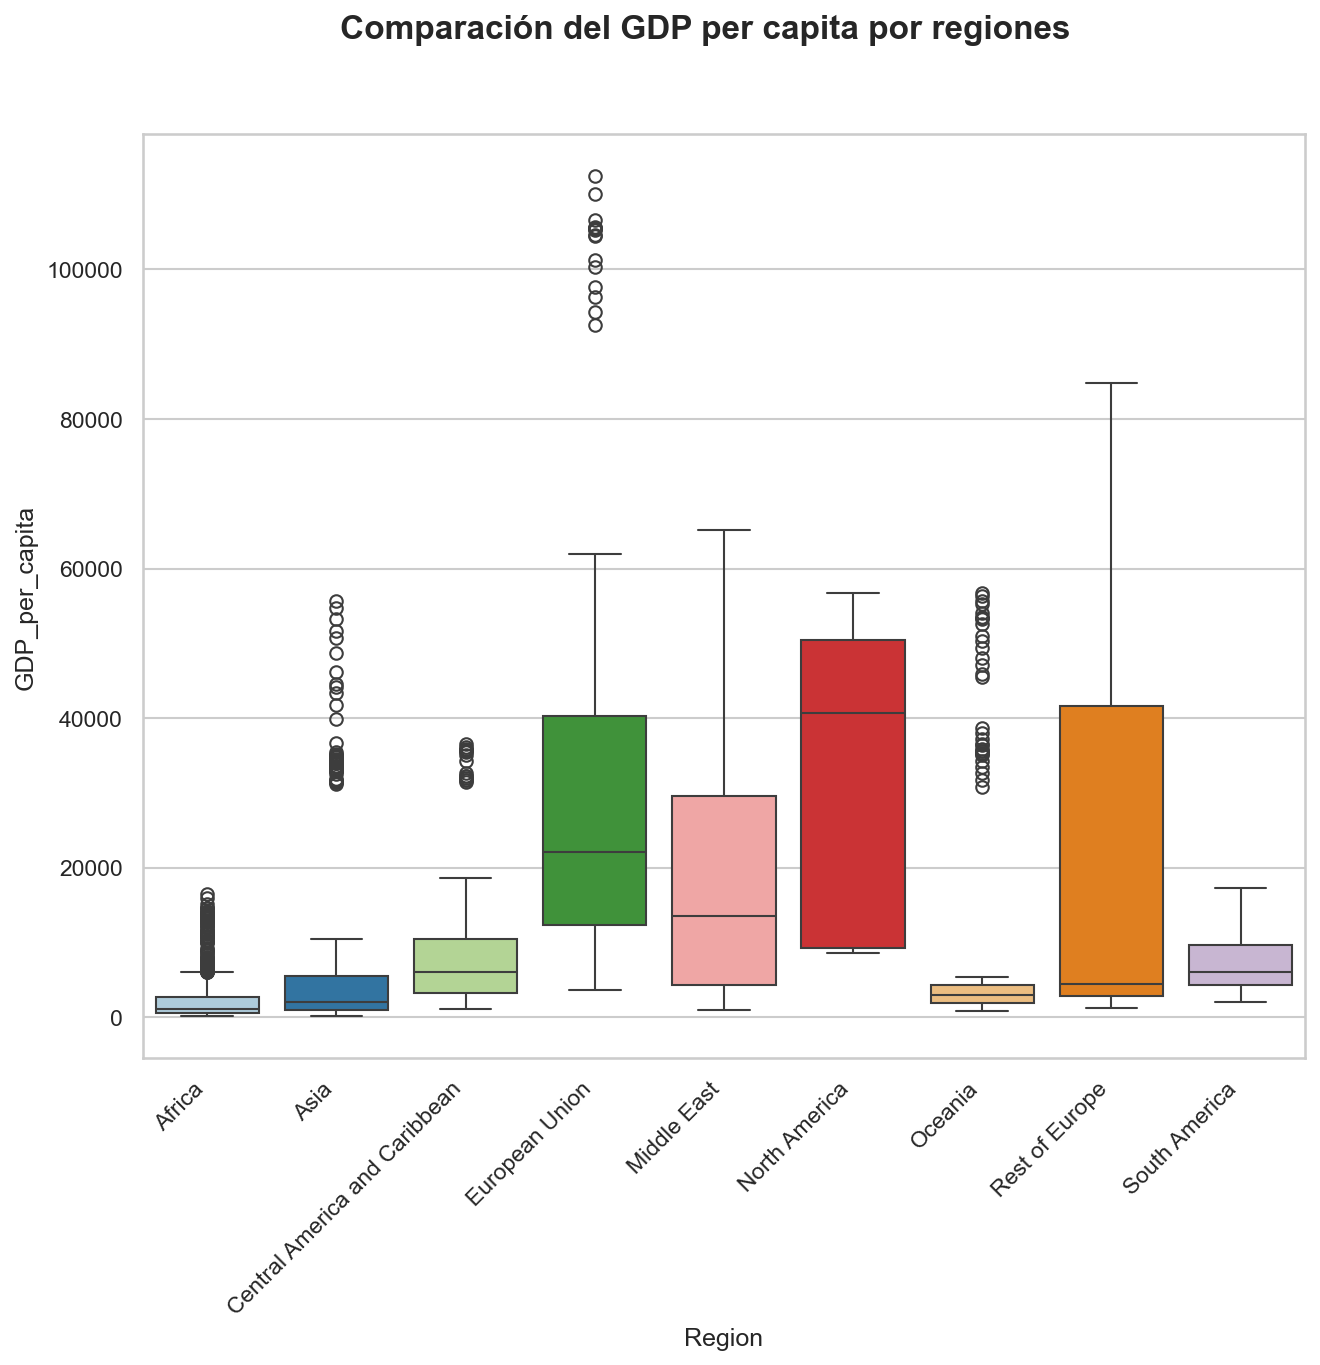

In [13]:
fig, ax_gpd = plt.subplots(figsize=(10,8),dpi=150)

sns.boxplot(
    x="Region",
    y="GDP_per_capita",
    data=Life_expectancy,
    ax=ax_gpd,
    palette=palette,  # Usar paleta personalizada
    hue="Region",
    order=region_order,
)
# Rotar las etiquetas del eje x para mejor legibilidad
plt.setp(ax_gpd.get_xticklabels(), rotation=45, ha='right')

# Título general para toda la figura
fig.suptitle("Comparación del GDP per capita por regiones", fontsize=16, weight='bold')

plt.show()

Las regiones de 

- África
- Asia
- Ámerica Central y el Caribe
- Oceanía
- Ámerica del sur

Tienen a paises que se encuentran en un rango muy estrecho de GDP per capita. Sin contar los outliers, esto lo podemos intepretar como una homogenización en estas regiones.

En las regiones de 

- Union Europea,
- Oriente Medio
- Norte Ámerica
- Resto de Europa

Vemos mayor variabilidad entre los paises de la region


### 🍻 **Consumo de Alcohol**

Vamos a mostrar el detalladamente la variable de consumo de alcohol


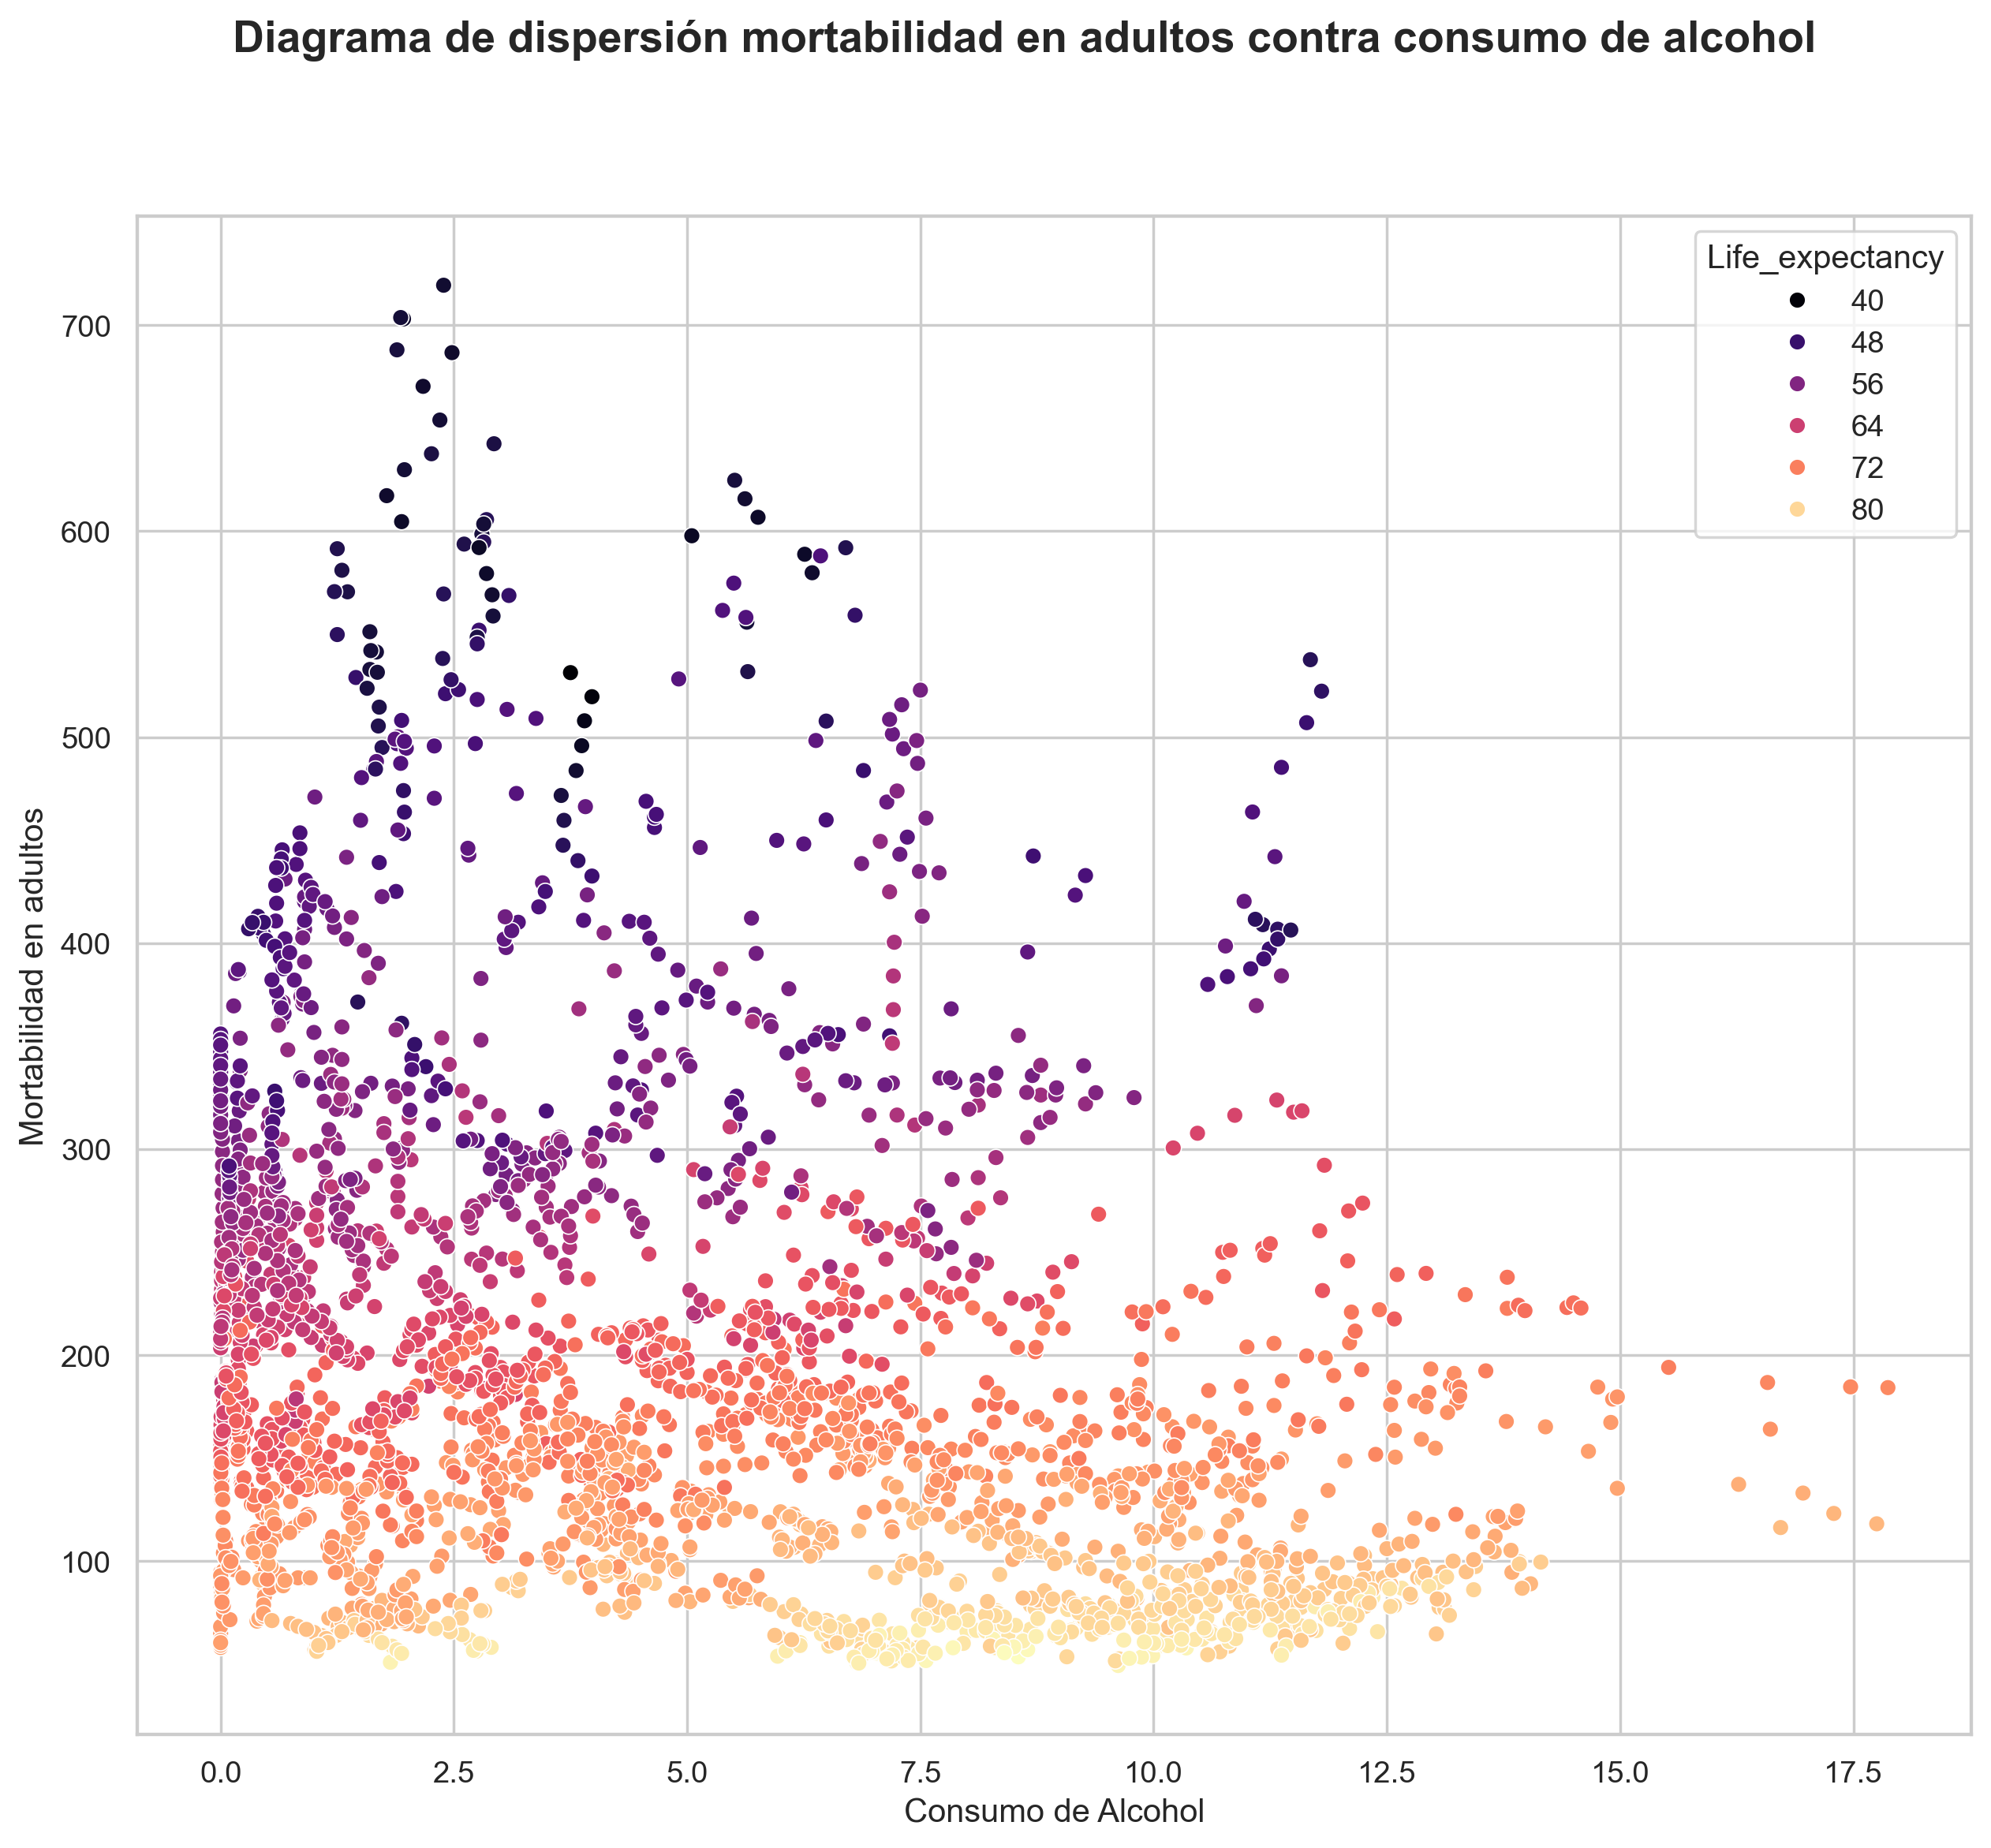

In [15]:
fig, ax_a = plt.subplots(figsize=(12,10), dpi=250)

sns.scatterplot(
    data=Life_expectancy,
    x="Alcohol_consumption",
    y="Adult_mortality",
    hue="Life_expectancy",
    palette="magma"   
)

# Título general para toda la figura

fig.suptitle("Diagrama de dispersión mortabilidad en adultos contra consumo de alcohol", fontsize=16, weight='bold')
ax_a.set_xlabel("Consumo de Alcohol")
ax_a.set_ylabel("Mortabilidad en adultos")

plt.show()

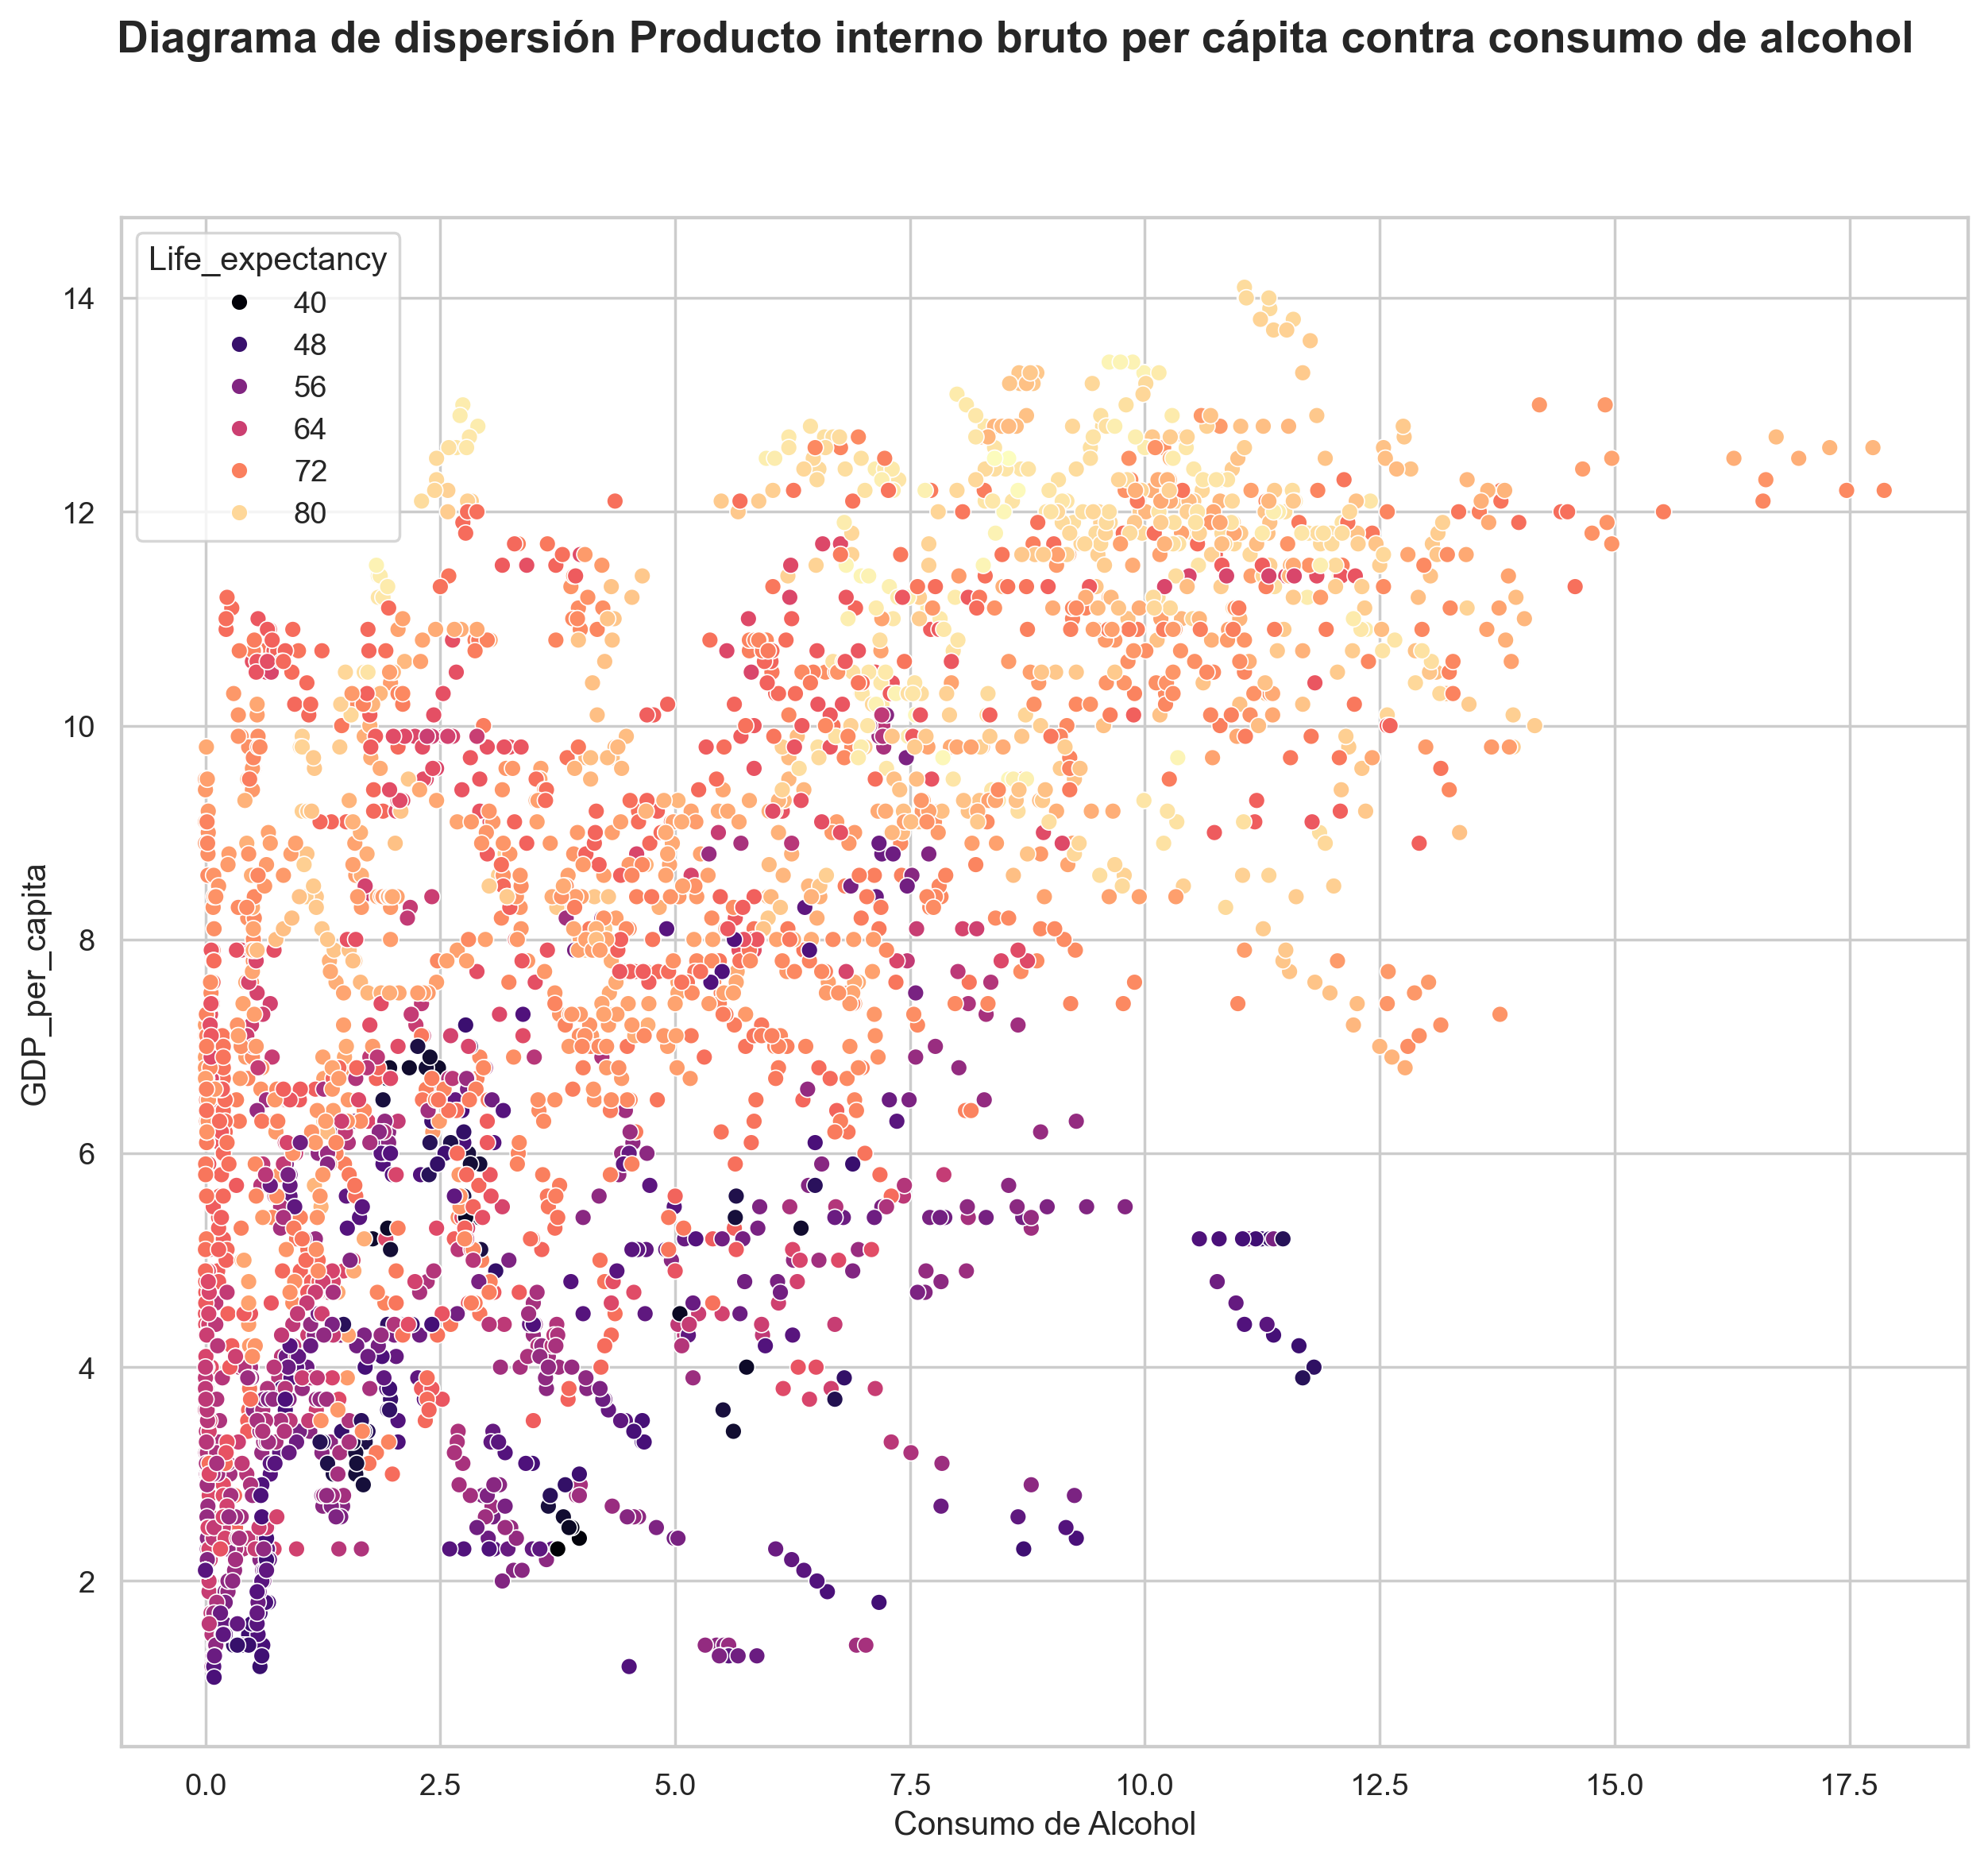

In [17]:
fig, ax_a = plt.subplots(figsize=(12,10), dpi=250)

sns.scatterplot(
    data=Life_expectancy,
    x="Alcohol_consumption",
    y="Schooling",
    hue="Life_expectancy",
    palette="magma"   
)

# Título general para toda la figura

fig.suptitle("Diagrama de dispersión Producto interno bruto per cápita contra consumo de alcohol", fontsize=16, weight='bold')
ax_a.set_xlabel("Consumo de Alcohol")
ax_a.set_ylabel("GDP_per_capita")

plt.show()

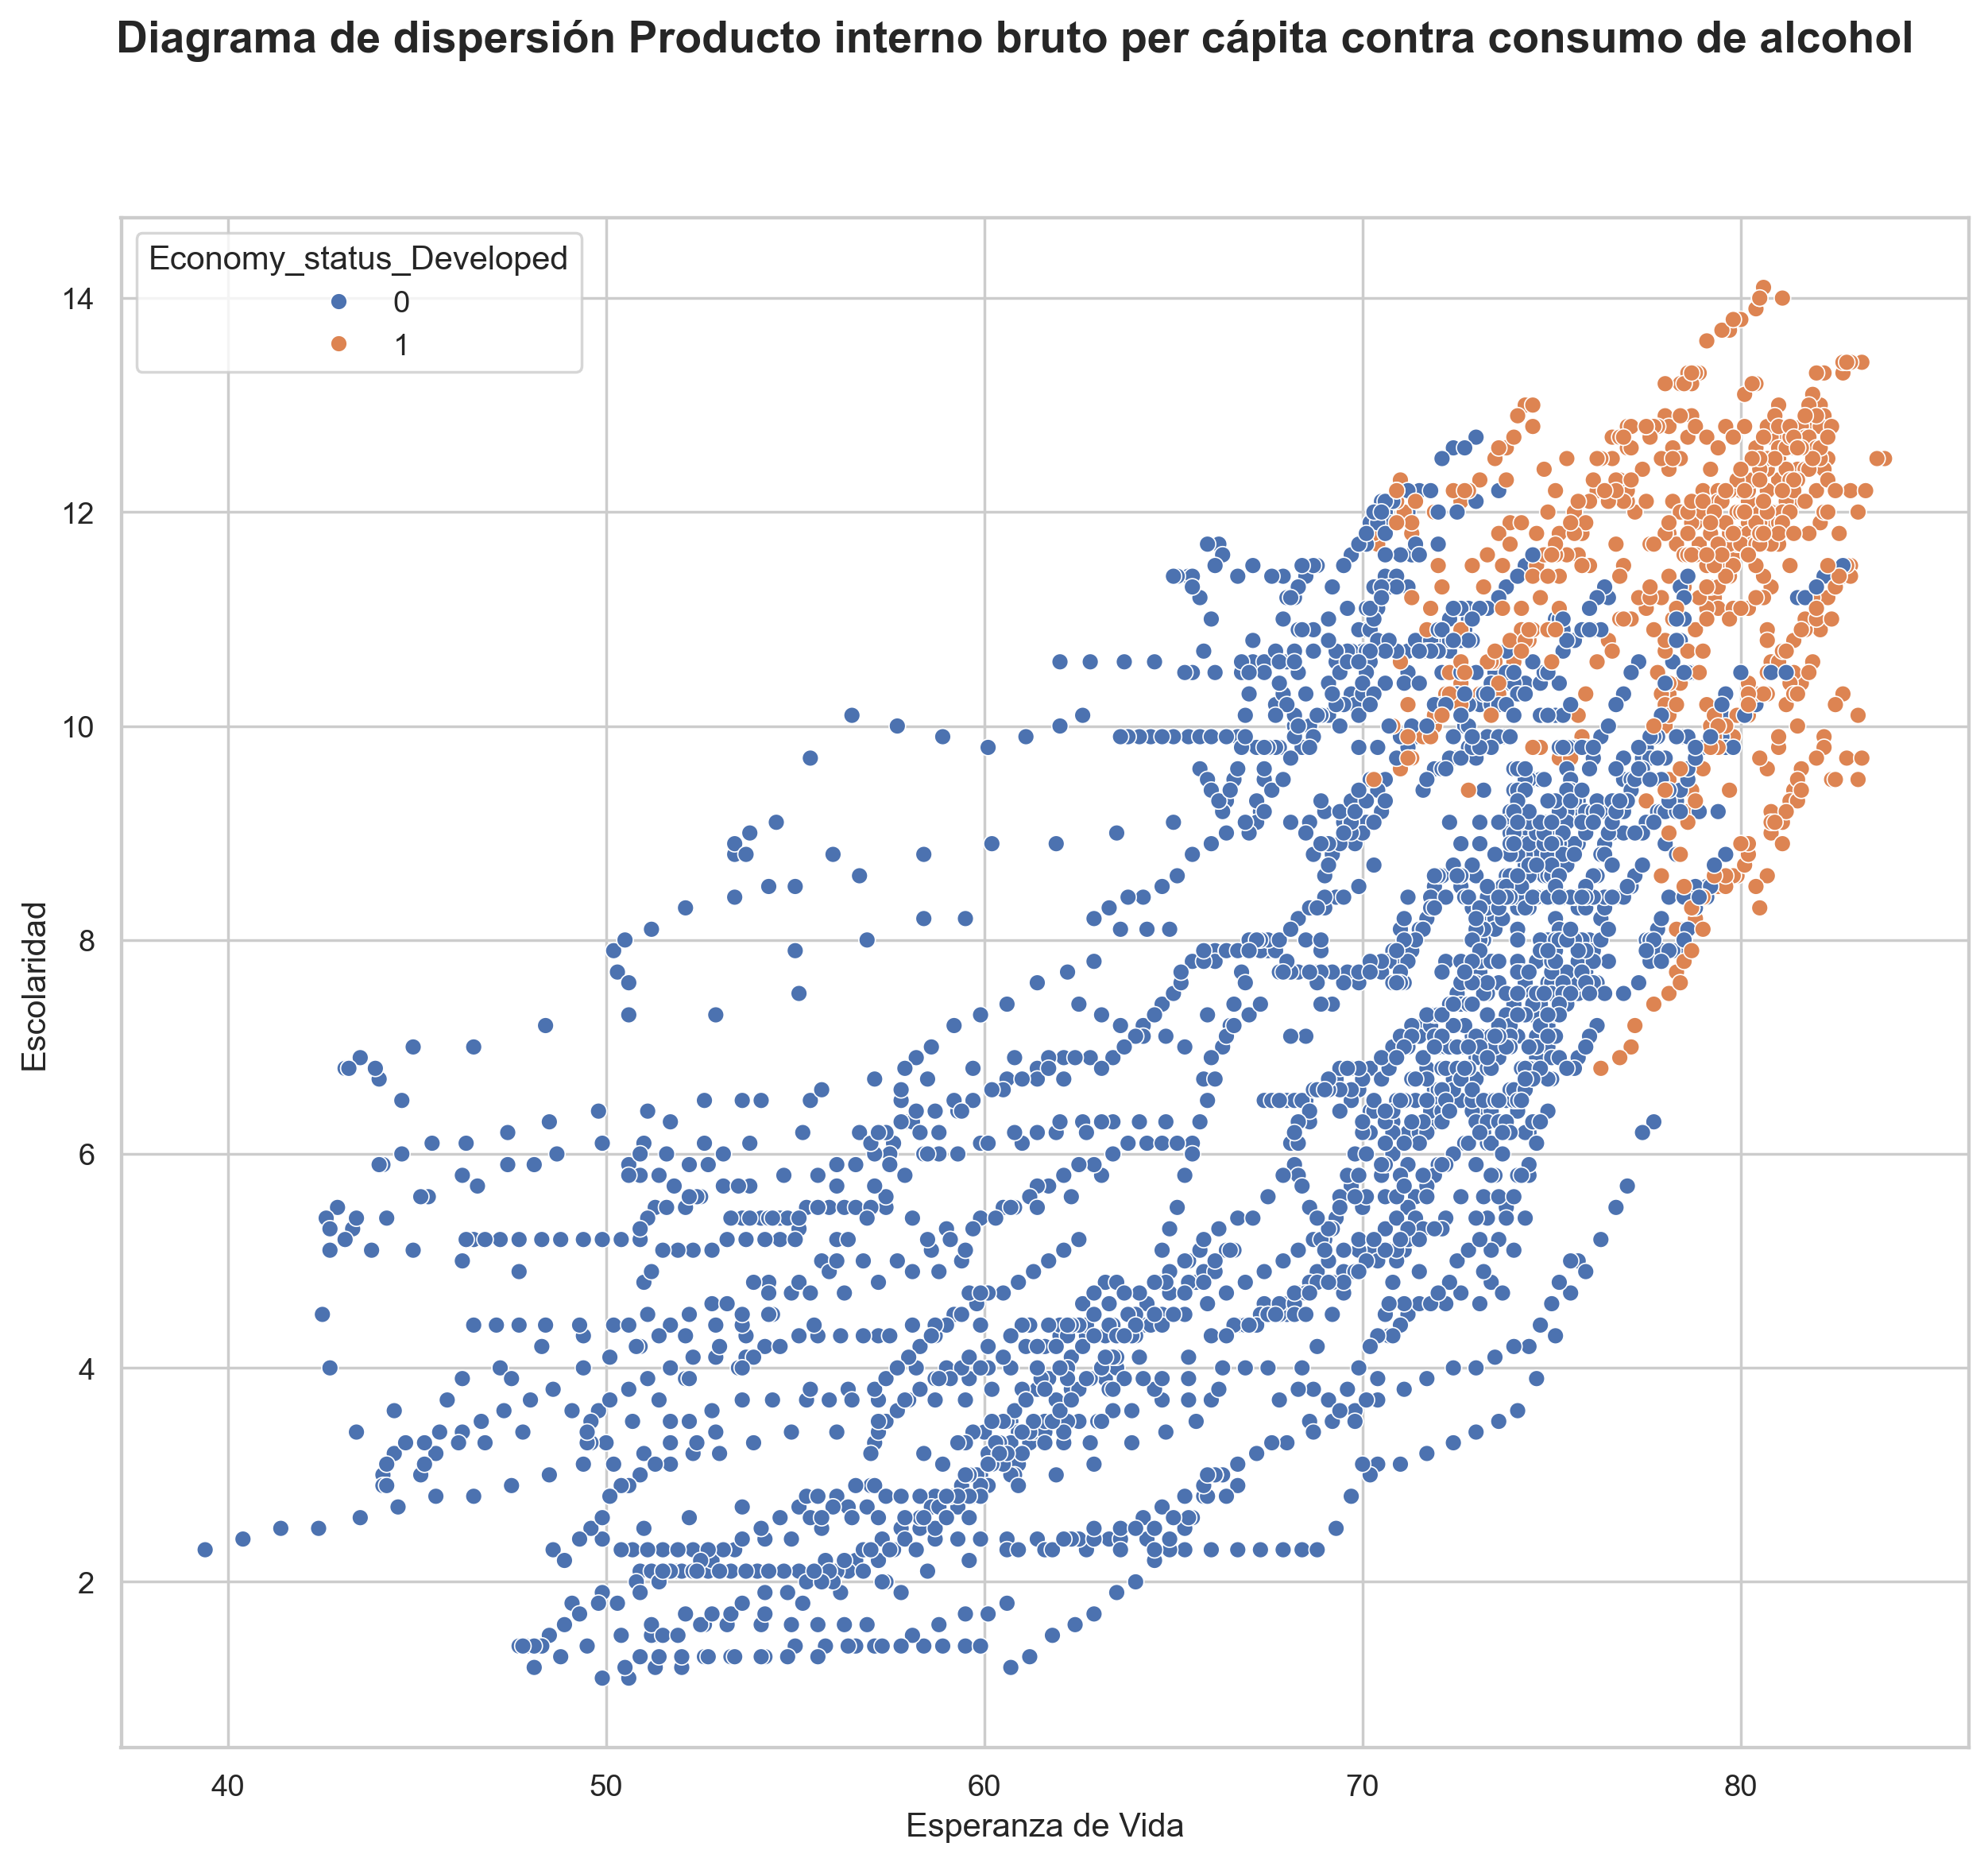

In [18]:
fig, ax_a = plt.subplots(figsize=(12,10), dpi=250)

sns.scatterplot(
    data=Life_expectancy,
    x="Life_expectancy",
    y="Schooling",
    hue="Economy_status_Developed"  
)

# Título general para toda la figura

fig.suptitle("Diagrama de dispersión Producto interno bruto per cápita contra consumo de alcohol", fontsize=16, weight='bold')
ax_a.set_xlabel("Esperanza de Vida")
ax_a.set_ylabel("Escolaridad")

plt.show()

## Matriz de Correlacion
Vamos a generar la matriz de correlacion usando pyspark, a diferencia de pandas, incluye de forma nativa esta funcion para todas los columnas, únicamente entre dos columnas, por lo cual haremos lo siguiente:

1. Obtener el nombre de las oclumnas numericas
2. Obtener la informacion de la matriz de correlacion en un diccionario
3. Convertir el diccionario a una matriz de correlacion

En este caso, hemos necesitado un paso extra, por problems con el spark, por lo que escribimos el archivo en csv y lo cargamos para leerlo

### Fórmula de la Correlación de Pearson
$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

### Explicación

La **correlación de Pearson** $ r $ mide la **fuerza** y **dirección** de la relación lineal entre dos variables $ X $ y $ Y $.

- $ x_i $ y $ y_i $: Valores individuales de las variables $ X $ y $ Y $.
- $ \bar{x} $ y $ \bar{y} $: Medias (promedios) de las variables $ X $ y $ Y $, respectivamente.
- $ n $: Número total de observaciones.

### Interpretación del valor de $ r $

- **$ r = 1 $**: Correlación positiva perfecta (ambas variables aumentan juntas).
- **$ r = -1 $**: Correlación negativa perfecta (una variable aumenta mientras la otra disminuye).
- **$ r = 0 $**: No hay correlación lineal entre las variables.

### Ejemplo de Interpretación

| Valor de $ r $  | Interpretación                    |
|-------------------|----------------------------------|
| 0.7 a 1.0         | Correlación fuerte positiva       |
| 0.3 a 0.7         | Correlación moderada positiva     |
| 0.0 a 0.3         | Correlación débil positiva        |
| -0.3 a 0.0        | Correlación débil negativa        |
| -0.7 a -0.3       | Correlación moderada negativa     |
| -1.0 a -0.7       | Correlación fuerte negativa       |

Este coeficiente es muy útil para identificar relaciones lineales, pero no detecta relaciones no lineales.

In [19]:
numeric_columns = [field.name for field in dataset.schema.fields if isinstance(field.dataType, NumericType)]

In [20]:
# Calcular la correlación entre todas las columnas numéricas
correlation_matrix = {}

for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        col1 = numeric_columns[i]
        col2 = numeric_columns[j]
        correlation = dataset.corr(col1, col2)
        correlation_matrix[(col1, col2)] = correlation

In [21]:
# Obtener todas las variables únicas
variables = set()
for var1, var2 in correlation_matrix.keys():
    variables.add(var1)
    variables.add(var2)

variables = sorted(list(variables))  # Ordenar las variables alfabéticamente

# Crear una lista para almacenar los datos en formato de tabla
data = []
for variable in variables:
    row = [variable]  # La primera columna es el nombre de la variable
    for other_variable in variables:
        # Buscar la correlación correspondiente en el diccionario
        if (variable, other_variable) in correlation_matrix:
            correlation = correlation_matrix[(variable, other_variable)]
        elif (other_variable, variable) in correlation_matrix: # Check for reverse order
            correlation = correlation_matrix[(other_variable, variable)]
        else:
            correlation = ""  # Dejar en blanco si no hay correlación
        row.append(correlation)
    data.append(row)

# Escribir los datos en un archivo CSV
with open("../data/Generated/correlation_matrix2.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Variable"] + variables)  # Escribir la fila de encabezado
    writer.writerows(data)  # Escribir los datos

In [ ]:
correlation_matrix_Life_expectancy = spark.read.csv(
    path="../data/Generated/correlation_matrix2.csv",
    header="true",
    inferSchema=True)

In [23]:
correlation_matrix_pd = correlation_matrix_df.toPandas().set_index("Variable")

<Axes: ylabel='Variable'>

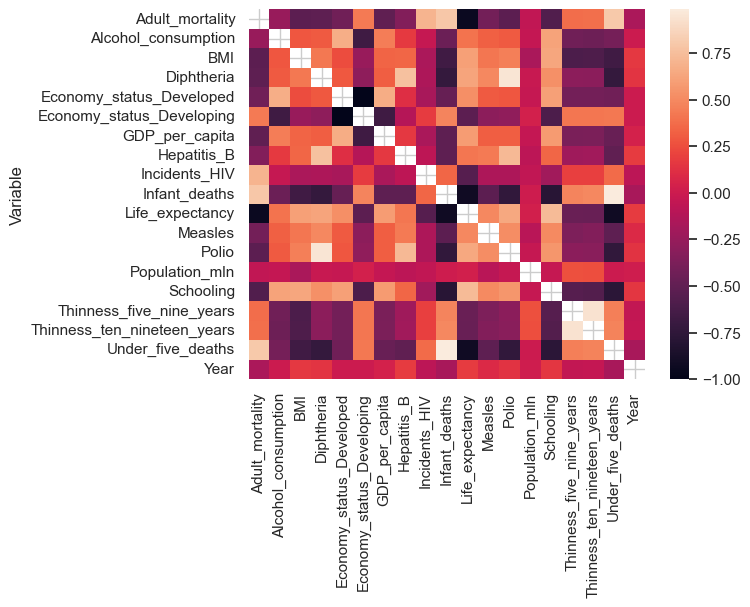

In [24]:
sns.heatmap(correlation_matrix_pd)

En este caso, necesitamos transformar la información a un dataframe de pandas para generar la matriz de correlacion. 
Continuaremos con la exploración de los datos, para esto usaremos pandas debido a su practicidad, posteriormente regresaremos a spark.

En la matriz de correlacion podemos observar que existen variables que estan relacionadas linealmente entre ellas, dejaremos unicamente aquellas que tengan una correlacion mayor a $\| 0.6 \|$ 

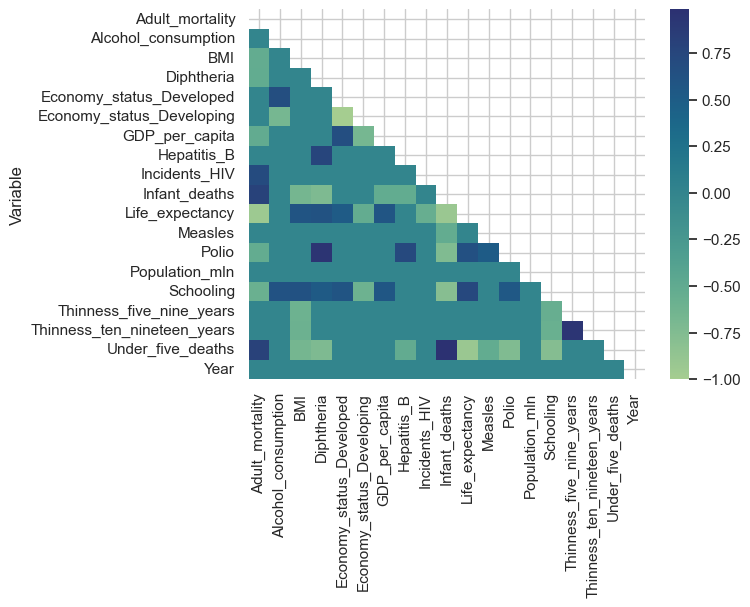

In [25]:
filteredCorr = correlation_matrix_pd.map(lambda x: 0 if -0.5 < x < 0.5 else x)
mask = np.triu(correlation_matrix_pd)
mask[np.diag_indices_from(mask)] = False

sns.heatmap(filteredCorr, cmap="crest",    mask = mask)

plt.show()

En el ejercicio anterior podemos ver que Spark no esta automatizado para la visualizacion de datos y para la exploración de datos, por lo que vamos a continuar en pandas. Con esto no digo que no se pueda usar con este fin, pero su proposito principal es otro.

Con base a lo visto anteriormente, vamos a crear la matriz de correlación elimiando columnas que no son necesarias. 

**Notemos lo siguiente:** la información de las columnas `Economy_status_Developed` y `Economy_status_Developing`, continene la misma información representada de diferente manera, por lo que vamos a reducirla a una columna

In [27]:
# Creating one column out of developing and developed economy status
Life_expectancy['Status'] = Life_expectancy['Economy_status_Developed']
Life_expectancy.drop(['Economy_status_Developed', 'Economy_status_Developing'], axis=1, inplace=True)

Verificamos que no tengamos valores nulos

In [29]:
Life_expectancy.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Life_expectancy                0
Status                         0
dtype: int64

Podemos ver a través de la funcion `describe` una descripción estadística básica de nuestro data frame

In [31]:
Life_expectancy.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Life_expectancy       Status  
count  2864.000000      2864.000000  2864.000000  
mean      7.632123        68.856075     0.206704  
std       3.171556         9.405608     0.405012  
min       1.100000        39.400000     0.000000  
25%       5.100000        62.700000     0.000000  
50%       7.800000        71.400000     0.000000  
75%      10.300000        75.400000     0.000000  
max      14.100000        83.800000     1.000000

In [36]:
# Obtener la descripción estadística del dataframe
description = Life_expectancy.describe()
description

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Life_expectancy       Status  
count  2864.000000      2864.000000  2864.000000  
mean      7.632123        68.856075     0.206704  
std       3.171556         9.405608     0.405012  
min       1.100000        39.400000     0.000000  
25%       5.100000        62.700000     0.000000  
50%       7.800000        71.400000     0.000000  
75%      10.300000        75.400000     0.000000  
max      14.100000        83.800000     1.000000

In [37]:

# Verificar si hay valores nulos en el dataframe
null_values = Life_expectancy.isnull().sum()
print(null_values)

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Life_expectancy                0
Status                         0
dtype: int64


In [38]:
# Identificar outliers significativos
# Usaremos el rango intercuartílico (IQR) para detectar outliers
numeric_cols = Life_expectancy.select_dtypes(include=[np.number]).columns
Q1 = Life_expectancy[numeric_cols].quantile(0.25)
Q3 = Life_expectancy[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((Life_expectancy[numeric_cols] < (Q1 - 1.5 * IQR)) | (Life_expectancy[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print(outliers)


Year                             0
Infant_deaths                   29
Under_five_deaths              102
Adult_mortality                112
Alcohol_consumption              2
Hepatitis_B                    164
Measles                         35
BMI                             25
Polio                          190
Diphtheria                     187
Incidents_HIV                  461
GDP_per_capita                 425
Population_mln                 362
Thinness_ten_nineteen_years     89
Thinness_five_nine_years        95
Schooling                        0
Life_expectancy                 19
Status                         592
dtype: int64


In [39]:
outliers = ((Life_expectancy[numeric_cols] < (Q1 - 2 * IQR)) | (Life_expectancy[numeric_cols] > (Q3 + 2 * IQR))).sum()
print(outliers)

Year                             0
Infant_deaths                    6
Under_five_deaths               26
Adult_mortality                 56
Alcohol_consumption              0
Hepatitis_B                     62
Measles                          0
BMI                              0
Polio                          110
Diphtheria                     134
Incidents_HIV                  406
GDP_per_capita                 339
Population_mln                 292
Thinness_ten_nineteen_years     47
Thinness_five_nine_years        51
Schooling                        0
Life_expectancy                  0
Status                         592
dtype: int64


Vemos que si tenemos valores que sobresalen, sin embargo, es una cantidad que podemos considerar "reducida"

**Varibles Categoricas**

In [40]:
Life_expectancy[['Country', 'Year', 'Status', "Region"]].nunique()

Country    179
Year        16
Status       2
Region       9
dtype: int64

Distribución de la varible Estatus

In [41]:
Life_expectancy\
.groupby('Status')['Country']\
.nunique()\
.reset_index()

Status  Country
0       0      142
1       1       37

Distribución de los paises distribuido por region

In [42]:
Life_expectancy\
.groupby('Region')['Country']\
.nunique()\
.reset_index()

Region  Country
0                         Africa       51
1                           Asia       27
2  Central America and Caribbean       19
3                 European Union       27
4                    Middle East       14
5                  North America        3
6                        Oceania       11
7                 Rest of Europe       15
8                  South America       12

Distribución de los paises de acuerdo a su región y su estatus

In [43]:
Life_expectancy\
.groupby(['Region', 'Status'])['Country']\
.nunique()\
.reset_index()

Region  Status  Country
0                          Africa       0       51
1                            Asia       0       26
2                            Asia       1        1
3   Central America and Caribbean       0       19
4                  European Union       1       27
5                     Middle East       0       13
6                     Middle East       1        1
7                   North America       0        1
8                   North America       1        2
9                         Oceania       0        9
10                        Oceania       1        2
11                 Rest of Europe       0       11
12                 Rest of Europe       1        4
13                  South America       0       12

In [45]:
# Select only numeric columns for correlation calculation
numeric_cols = Life_expectancy.select_dtypes(include=[np.number]).columns
df_corr = Life_expectancy[numeric_cols].corr()

In [46]:
mask = np.triu(df_corr)
mask[np.diag_indices_from(mask)] = False

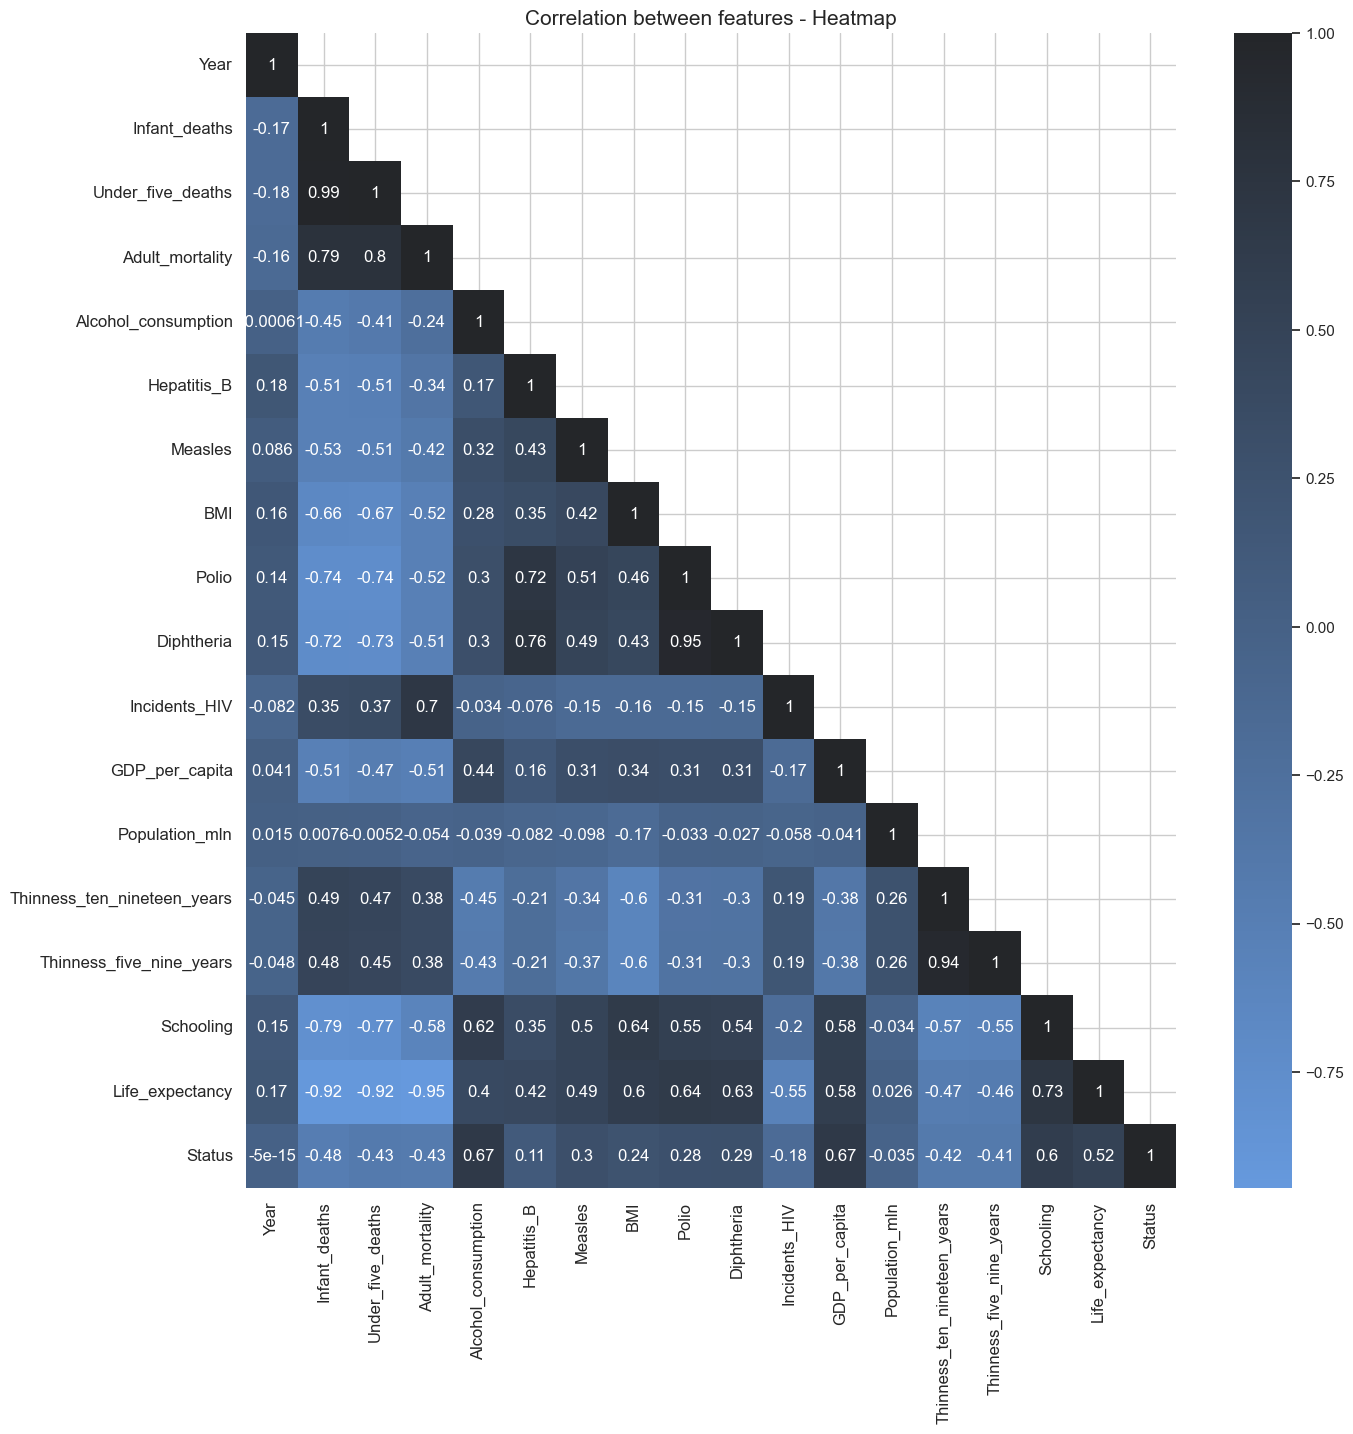

In [47]:
plt.rcParams['figure.figsize'] = (15, 15)

sns.heatmap(
    df_corr, 
    annot = True, 
    cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True),
    xticklabels = df_corr.columns.values,
    yticklabels = df_corr.columns.values,
    mask = mask);

plt.title('Correlation between features - Heatmap', fontsize = 15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

Podemos ver una alta correlación entre un par de características, por lo tanto, no es necesario mantener todas ellas ya que su impacto será explicado por otra característica.

*   Muertes infantiles y muertes menores de cinco años por mortalidad adulta
*   Difteria por polio
*   Delgadez 5-9 años por delgadez 10-19 años



In [48]:
Life_expectancy.drop(['Infant_deaths','Under_five_deaths','Diphtheria','Thinness_five_nine_years'], axis=1, inplace=True)

In [50]:
# Moving to descriptive status for visualization purposes
Life_expectancy['Status'] = np.where(Life_expectancy['Status'] == 1, 'Developed', 'Developing')

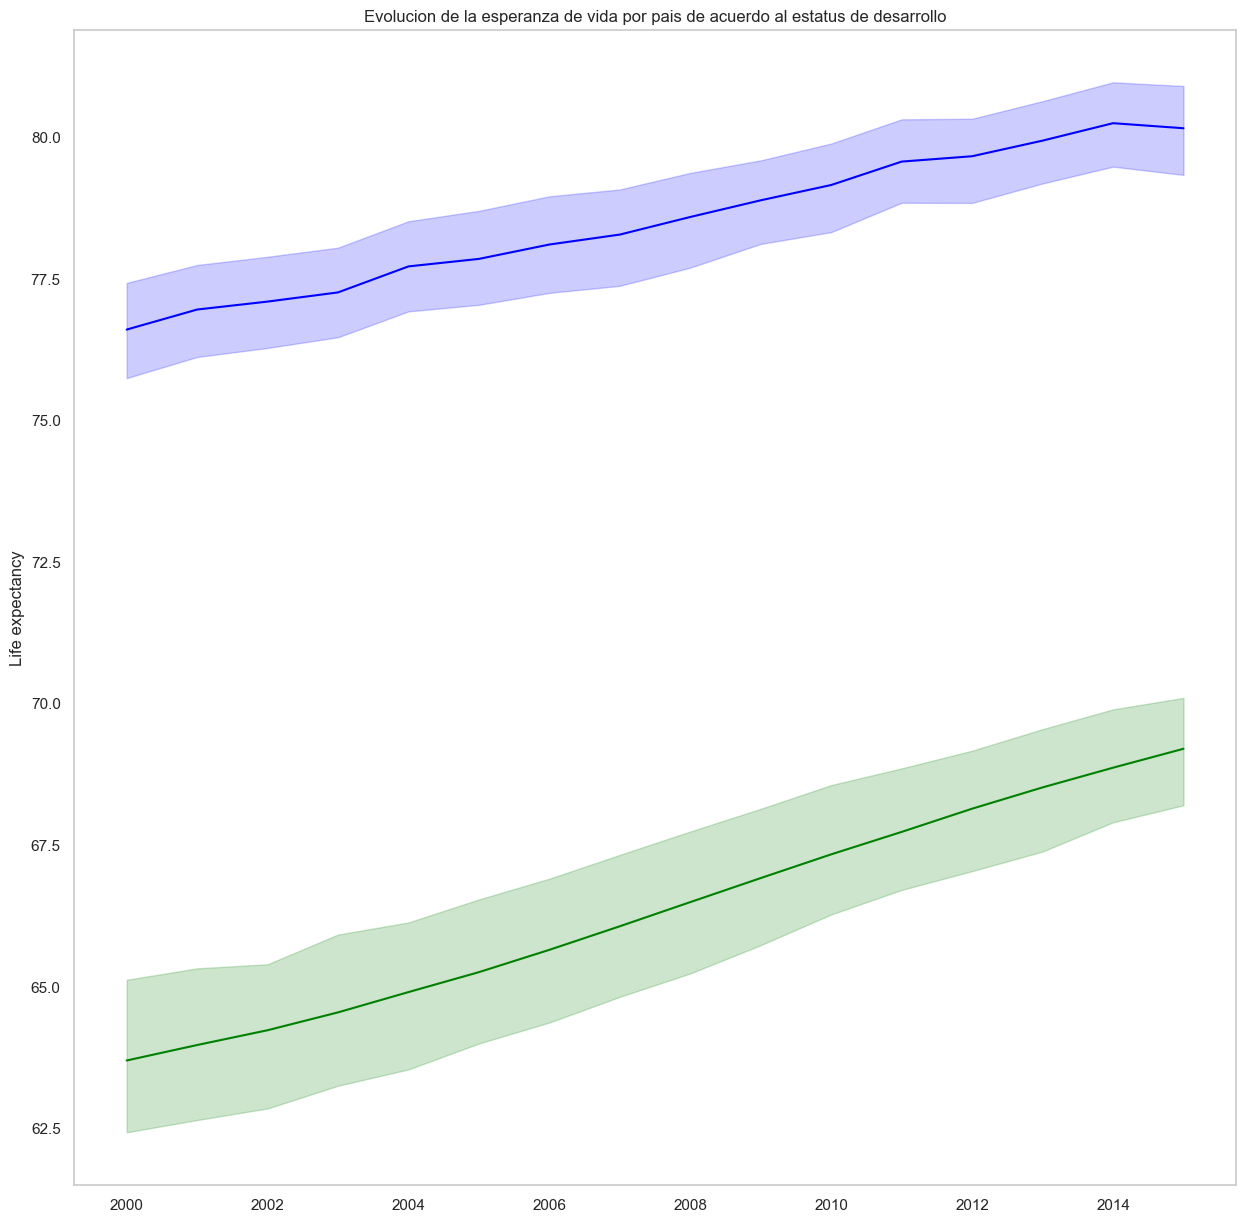

In [ ]:
ax = sns.lineplot(
    data=Life_expectancy[Life_expectancy["Status"] == "Developing"], 
    x="Year", 
    y="Life_expectancy", 
    color='Green',
    errorbar=('ci', 90))

ax = sns.lineplot(
    data=Life_expectancy[Life_expectancy["Status"] == "Developed"], 
    x="Year", 
    y="Life_expectancy", 
    color='Blue',
    errorbar=('ci', 90))

ax.set_xlabel(None)
ax.set_ylabel("Life expectancy")
ax.set_title("Evolucion de la esperanza de vida por pais de acuerdo al estatus de desarrollo")

plt.grid()
plt.show()

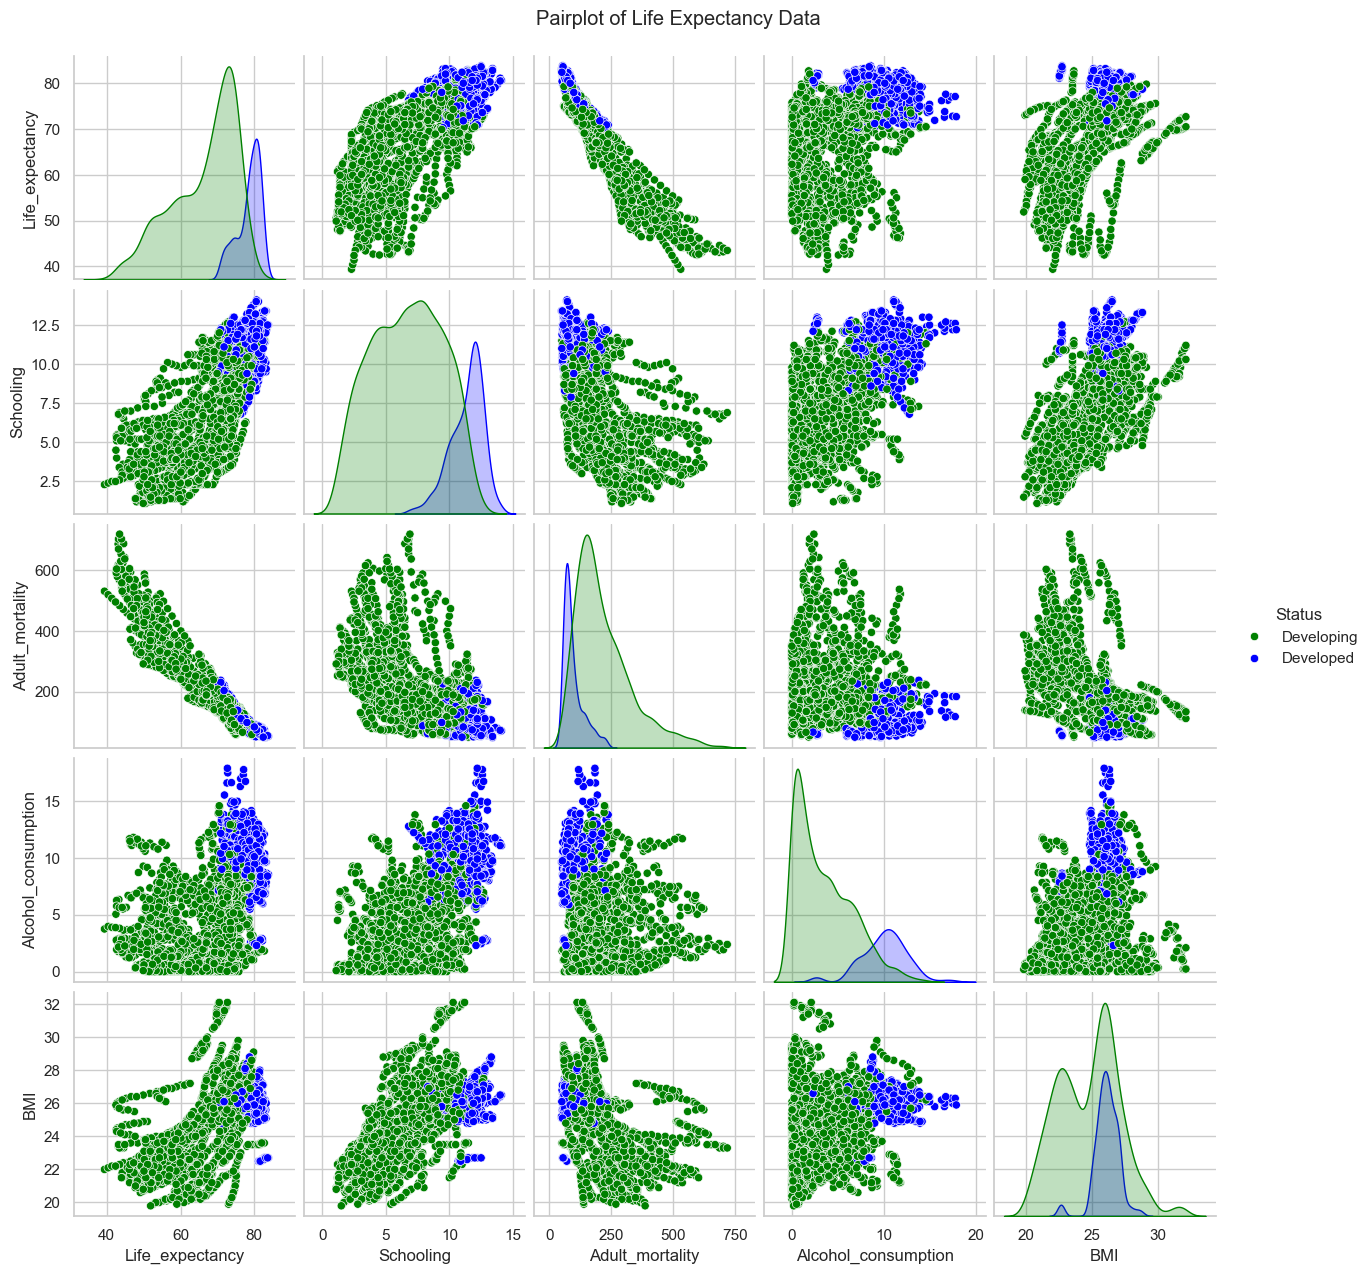

In [59]:
sns.pairplot(
    data=Life_expectancy[["Life_expectancy","Status", "Schooling", "Adult_mortality", "Alcohol_consumption", "BMI"]],
    hue="Status",
    palette=['Green', 'Blue']
)
plt.suptitle("Pairplot of Life Expectancy Data", y=1.02)
plt.show()

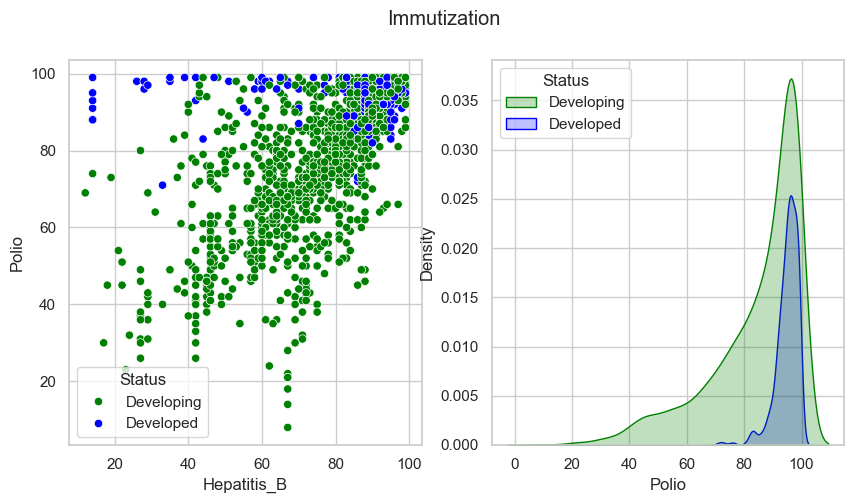

In [60]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2)

sns.scatterplot(ax=ax[0],
                data=Life_expectancy, 
                x="Hepatitis_B", 
                y="Polio",
                hue="Status",  
                palette=['Green','Blue'])

sns.kdeplot(ax=ax[1], data=Life_expectancy, x="Polio", hue="Status", 
            palette = ['Green', 'Blue'], fill=True, legend=True)

fig.suptitle('Immutization')
fig.tight_layout;

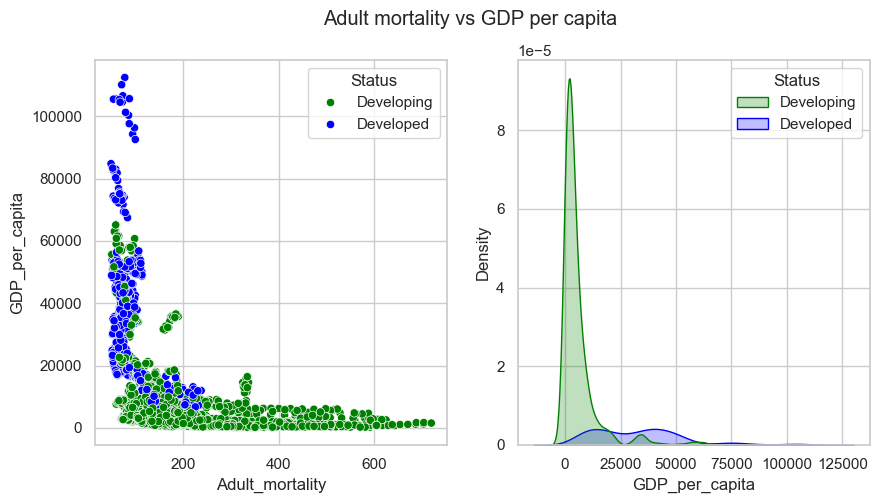

In [61]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2)

sns.scatterplot(ax=ax[0],
                data=Life_expectancy, 
                x="Adult_mortality", 
                y="GDP_per_capita",
                hue="Status",  
                palette=['Green','Blue'])

sns.kdeplot(ax=ax[1], data=Life_expectancy, x="GDP_per_capita", hue="Status", 
            palette = ['Green', 'Blue'], fill=True, legend=True)

fig.suptitle('Adult mortality vs GDP per capita')
fig.tight_layout;

In [62]:
# Features which seems to have biggest impact on adult mortality
to_plot = ["Adult_mortality", 'BMI', 'Polio', 'Schooling']

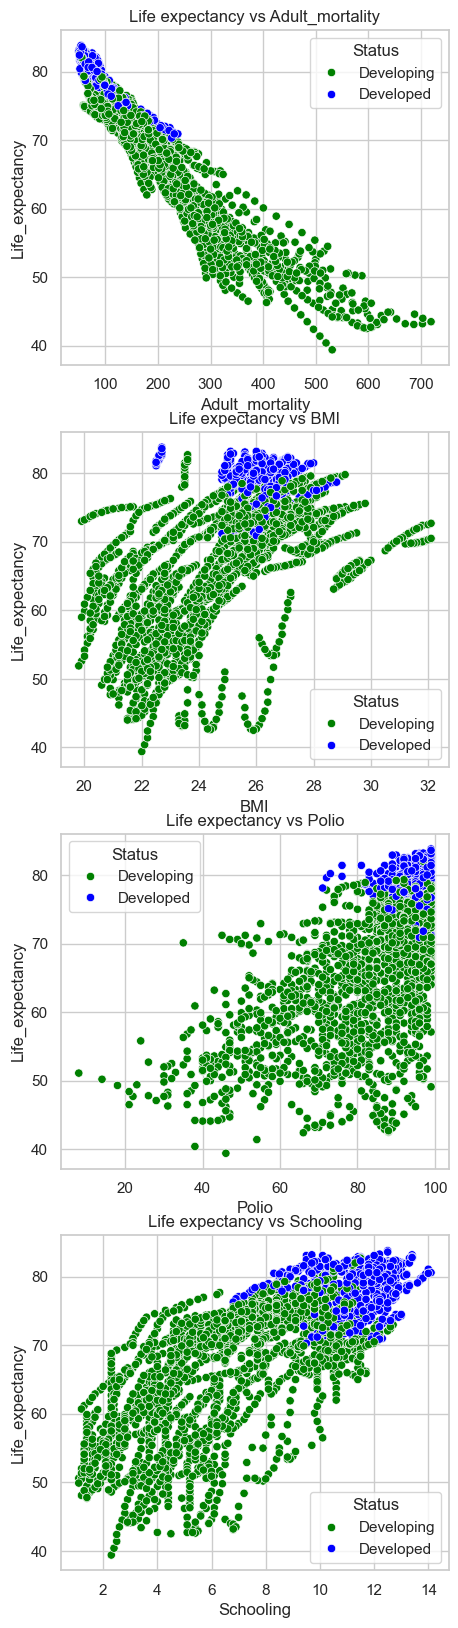

In [63]:
fig, ax = plt.subplots(figsize=(5,5*len(to_plot)), nrows=len(to_plot))

for i, feature in enumerate(to_plot):
  sns.scatterplot(ax=ax[i],
                  data=Life_expectancy, 
                  x=feature, 
                  y="Life_expectancy",
                  hue="Status",  
                  palette=['Green','Blue'])
  
  ax[i].set_title(f"Life expectancy vs {feature}")

fig.tight_layout;

A partir del análisis preliminar basado en la exploración y visualización de datos, podemos llegar a las siguientes conclusiones:

* No es sorprendente que un factor clave que influye en la esperanza de vida en un país determinado sea la mortalidad adulta.
* Otro factor importante es la escolaridad, que puede entenderse como una representación del nivel de bienestar en el país.
* Las personas en países desarrollados, en promedio, viven más tiempo que en los países en desarrollo, pero en ambos casos la distribución parece estar sesgada a la izquierda.
* La región con la menor esperanza de vida y la mayor dispersión es África.
* La esperanza de vida ha aumentado a lo largo de los años.
* En promedio, podemos observar niveles más altos de consumo de alcohol en los países desarrollados que en los países en desarrollo.
* En general, el nivel de cobertura de inmunización está correlacionado entre diferentes tipos de enfermedades, pero no vemos en este campo grandes ventajas de los países desarrollados, especialmente en la Hepatitis B.
* La mayor diferenciación entre los países desarrollados y en desarrollo se da en el PIB per cápita y la mortalidad adulta.

------

# Modelos

Para este proyecto realizaremos el entrenamiento de dos modelos

- Regresión lineal
- Arboles de decisio

## Preprocessing

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [239]:
# One-Hot encoding for region
ohe = pd.get_dummies(data=Life_expectancy, columns=["Region"])

In [240]:
ohe.head()

Country  Year  Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles  \
0  Turkiye  2015         105.8240                 1.32           97       65   
1    Spain  2015          57.9025                10.35           97       94   
2    India  2007         201.0765                 1.57           60       35   
3   Guyana  2006         222.1965                 5.68           93       74   
4   Israel  2012          57.9510                 2.89           97       89   

    BMI  Polio  Incidents_HIV  GDP_per_capita  ...      Status  Region_Africa  \
0  27.8     97           0.08           11006  ...  Developing          False   
1  26.0     97           0.09           25742  ...   Developed          False   
2  21.2     67           0.13            1076  ...  Developing          False   
3  25.3     92           0.79            4146  ...  Developing          False   
4  27.0     94           0.08           33995  ...   Developed          False   

   Region_Asia  Region_Central America and Caribbean Region_European Union  \
0        False                                 False                 False   
1        False                                 False                  True   
2         True                                 False                 False   
3        False                                 False                 False   
4        False                                 False                 False   

   Region_Middle East  Region_North America  Region_Oceania  \
0                True                 False           False   
1               False                 False           False   
2               False                 False           False   
3               False                 False           False   
4                True                 False           False   

   Region_Rest of Europe  Region_South America  
0                  False                 False  
1                  False                 False  
2                  False                 False  
3                  False                  True  
4                  False                 False  

[5 rows x 24 columns]

In [241]:
# Going back to binary status
ohe['Status'] = np.where(ohe['Status'] == 'Developed', 1, 0)

In [242]:
# Dropping Region_Africa to avoid collinearity
df_model = ohe.drop(["Country", "Year", "Region_Africa"], axis=1)

In [243]:
# Dividing set to explanatory and explained variables
X = df_model.loc[:, df_model.columns != "Life_expectancy"]
y = df_model["Life_expectancy"]

In [244]:
# Spliting set to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [245]:
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sma
from statsmodels.compat import lzip
from statsmodels.stats.api import het_breuschpagan

In [246]:
# Building model of all features
X_const = sma.add_constant(X)

In [247]:
# Ensure all data is numeric
X_const = pd.DataFrame(X_const).apply(pd.to_numeric, errors='coerce')
y = pd.Series(y).apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
X_const.columns = X.columns.insert(0, 'const')
X_const = X_const.dropna()
y = y.loc[X_const.index]

# Convert to numpy arrays
X_const = X_const.to_numpy()
y = y.to_numpy()

# Ensure all data is finite
X_const = np.nan_to_num(X_const.astype(float))
y = np.nan_to_num(y.astype(float))

OLS_model = sma.OLS(y, X_const).fit()

In [248]:
y

array([76.5, 82.8, 65.4, ..., 74.3, 71.8, 82.4], shape=(2864,))

In [249]:
X_const[:,0]

array([1., 1., 1., ..., 1., 1., 1.], shape=(2864,))

In [250]:
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     4078.
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:28:51   Log-Likelihood:                -5626.9
No. Observations:                2864   AIC:                         1.130e+04
Df Residuals:                    2843   BIC:                         1.142e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.3313      0.757     94.277      0.000      69.848      72.815
x1            -0.0635      0.001    -94.378      0.000      -0.065      -0.062
x2             0.0294      0.015      1.981      0.048       0.000       0.059
x3            -0.0075      0.003     -2.443      0.015      -0.014      -0.001
x4            -0.0002      0.002     -0.076      0.940      -0.005       0.004
x5            -0.0510      0.029     -1.782      0.075      -0.107       0.005
x6             0.0724      0.004     19.092      0.000       0.065       0.080
x7             0.3250      0.023     14.284      0.000       0.280       0.370
x8          9.877e-06   3.08e-06      3.210      0.001    3.84e-06    1.59e-05
x9          6.623e-05      0.000      0.254      0.800      -0.000       0.001
x10            0.0046      0.011      0.421      0.674      -0.017       0.026
x11            0.4409      0.022     19.809      0.000       0.397       0.485
x12            1.7209      0.214      8.045      0.000       1.301       2.140
x13            0.9053      0.138      6.541      0.000       0.634       1.177
x14            3.0923      0.149     20.740      0.000       2.800       3.385
x15            0.8854      0.227      3.907      0.000       0.441       1.330
x16            1.4447      0.173      8.351      0.000       1.106       1.784
x17            1.5392      0.308      4.997      0.000       0.935       2.143
x18            0.5839      0.181      3.229      0.001       0.229       0.939
x19            1.5982      0.175      9.121      0.000       1.255       1.942
x20            2.9554      0.171     17.287      0.000       2.620       3.291
==============================================================================
Omnibus:                       76.569   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.592
Skew:                          -0.235   Prob(JB):                     1.97e-28
Kurtosis:                       3.921   Cond. No.                     4.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [251]:
residuals = (OLS_model.resid)

In [252]:
# Checking heteroscedasticity 
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
test_result = het_breuschpagan(residuals, OLS_model.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', np.float64(375.26653183346093)),
 ('p-value', np.float64(2.7111899123611796e-67)),
 ('f-value', np.float64(21.434250867942602)),
 ('f p-value', np.float64(1.583586396902834e-72))]

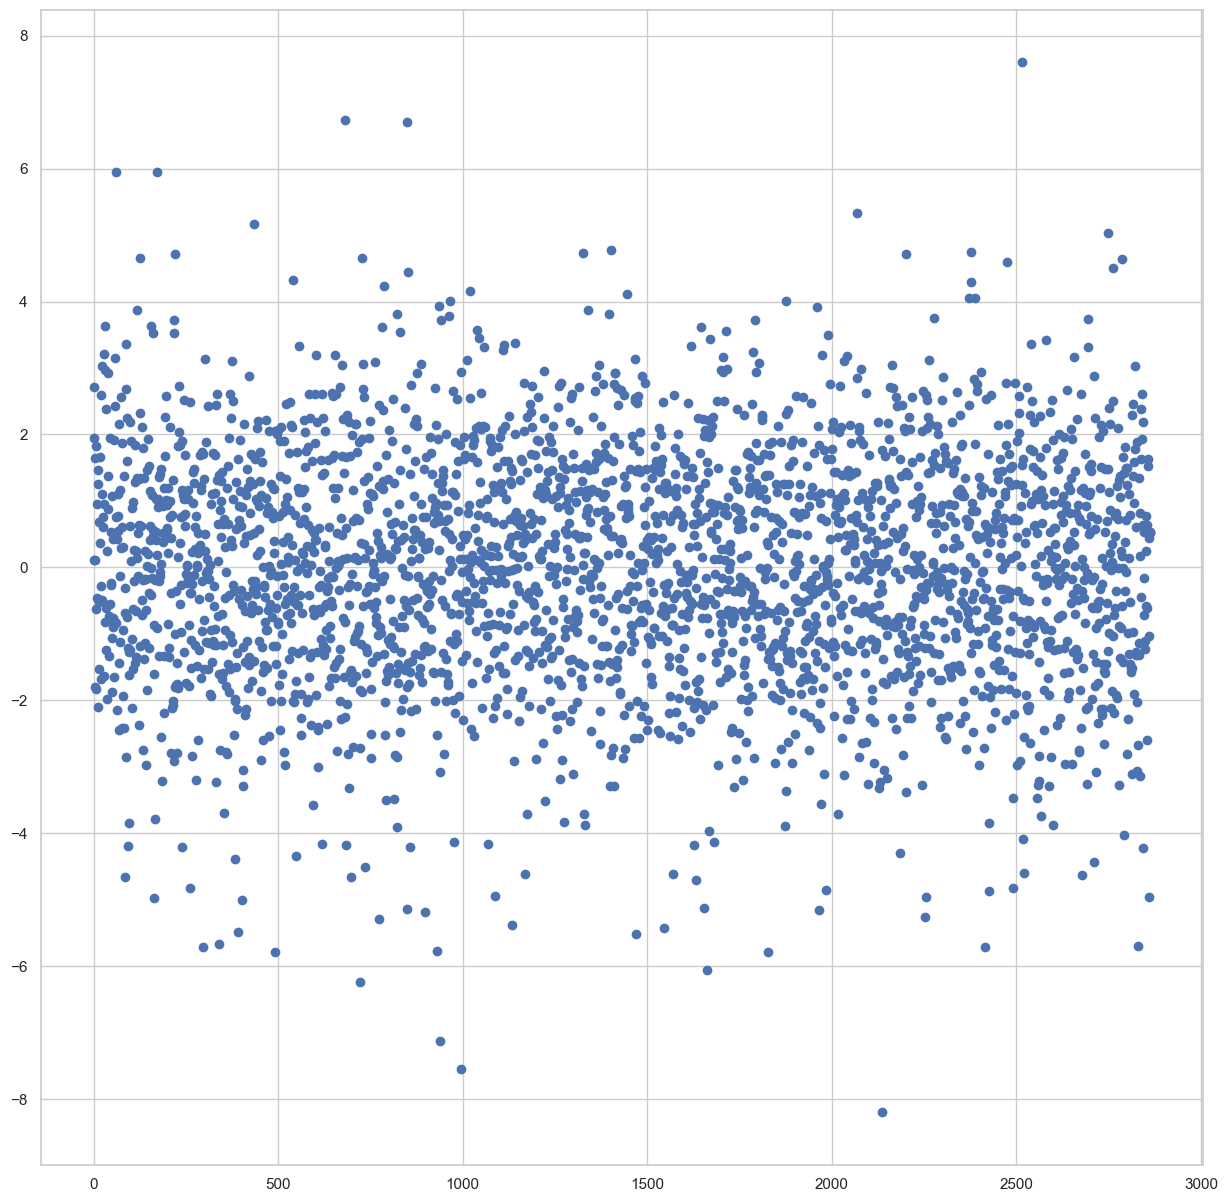

In [253]:
# Ploting residuals
plt.scatter(x=range(len(residuals)), y=OLS_model.resid)

Based on the Jarque-Bera test, Breusch-Pagan test and residual plot, I can assume that there are no significant issues with the data. After droping statistically insignificant features, I will build scikit learn regression model.

In [254]:
# Creating and fitting model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

## Decission Tree

In [255]:
from sklearn.tree import DecisionTreeRegressor

In [256]:
from sklearn.model_selection import GridSearchCV

In [257]:
model_dt = DecisionTreeRegressor(random_state=42)

## Models comparison

In [258]:
from sklearn.metrics import mean_squared_error, r2_score

In [261]:
# Fit the DecisionTreeRegressor model
model_dt.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)

In [262]:
mse_dt_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred_dt)
mse_dt_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred_dt)

r2_dt_train = r2_score(y_true=y_train, y_pred=y_train_pred_dt)
r2_dt_test = r2_score(y_true=y_test, y_pred=y_test_pred_dt)

In [263]:
y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_test)

In [264]:
mse_lr_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred_lr)
mse_lr_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred_lr)

r2_lr_train = r2_score(y_true=y_train, y_pred=y_train_pred_lr)
r2_lr_test = r2_score(y_true=y_test, y_pred=y_test_pred_lr)

In [265]:
df_comp = pd.DataFrame.from_dict({"test":[mse_dt_test, mse_lr_test, r2_dt_test, r2_lr_test],
                      "train":[mse_dt_train, mse_lr_train, r2_dt_train, r2_lr_train]},\
                       orient='index', columns = ["Decission tree MSE", "Linear Regression MSE", "Decission tree R2", "Linear Regression R2"])

In [295]:
melted_strat = pd.melt(df_comp.reset_index(), id_vars='index', var_name='model_metrics')
melted_strat

index          model_metrics     value
0   test     Decission tree MSE  0.849634
1  train     Decission tree MSE  0.000000
2   test  Linear Regression MSE  3.271100
3  train  Linear Regression MSE  2.911162
4   test      Decission tree R2  0.989762
5  train      Decission tree R2  1.000000
6   test   Linear Regression R2  0.960585
7  train   Linear Regression R2  0.967574

/var/folders/s5/q8jywgg1077gh0v_9qhyc6h40000gp/T/ipykernel_51100/4076507678.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(["Decision Tree", "Linear Regression"])
/var/folders/s5/q8jywgg1077gh0v_9qhyc6h40000gp/T/ipykernel_51100/4076507678.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["Decision Tree", "Linear Regression"])


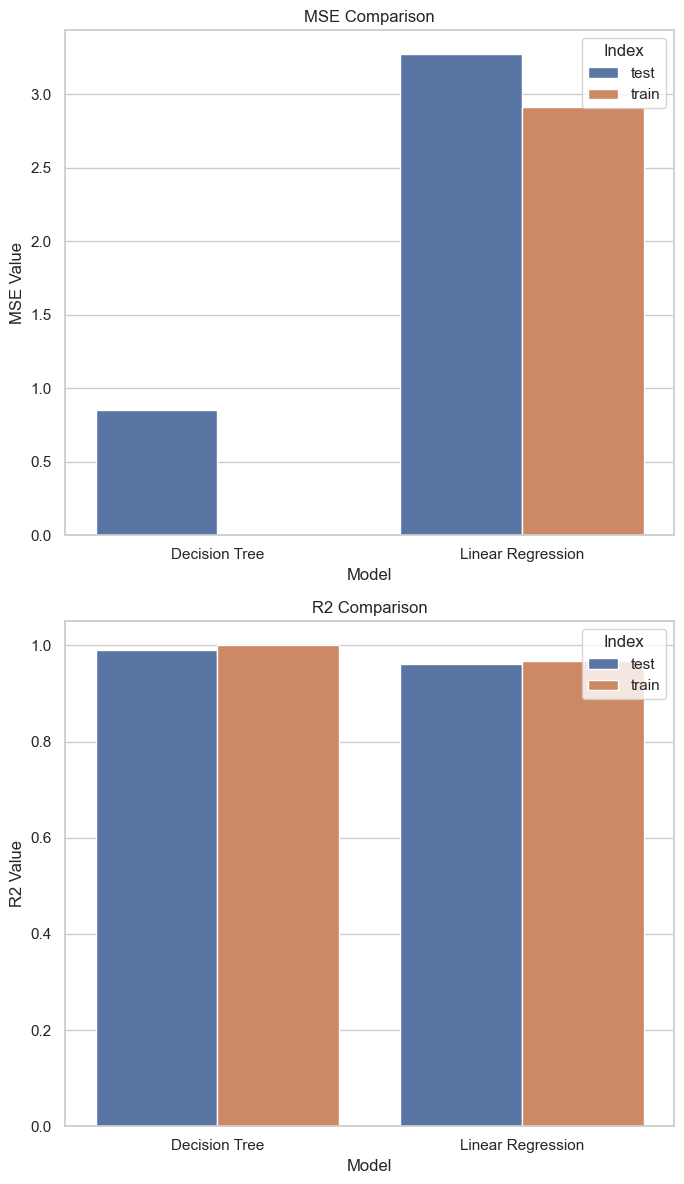

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming melted_strat is already defined
fig, ax = plt.subplots(2, 1, sharex=False, figsize=(7, 12))

# Plot for MSE comparison
sns.barplot(ax=ax[0], x='model_metrics', y='value', hue='index', data=melted_strat[:4].reset_index())\
    .set(title='MSE Comparison')
ax[0].set_xticklabels(["Decision Tree", "Linear Regression"])
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MSE Value')
ax[0].legend(title='Index', loc='upper right')

# Plot for R2 comparison
sns.barplot(ax=ax[1], x='model_metrics', y='value', hue='index', data=melted_strat[4:].reset_index())\
    .set(title='R2 Comparison')
ax[1].set_xticklabels(["Decision Tree", "Linear Regression"])
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R2 Value')
ax[1].legend(title='Index', loc='upper right')

# Improve overall layout
plt.tight_layout()
plt.show()

Above are presented results of comparison two models: Decission Tree and Linear Regression.

In general, Decission Tree provides better results, although has bigger problem with overfitting. 
Overfitting of DT still seems to be resonable, therefore it would be a chosen model for predictions.
